In [1]:
import pickle5 as pickle

In [9]:
import numpy as np
import pandas as pd
import csv
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

In [3]:
file = open('imbalanced_data.pickle', 'rb')
df1 = pickle.load(file)
file.close()

In [4]:
display(df1)

{'X_subtrain': array([[0.000000e+00, 1.125000e+05, 6.300000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.350000e+05, 8.799345e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.575000e+05, 5.212800e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        ...,
        [1.000000e+00, 6.750000e+04, 2.025000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 2.115000e+05, 4.266000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.000000e+00, 1.125000e+05, 2.700000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00]]),
 'X_valid': array([[0.000000e+00, 1.350000e+05, 5.212800e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.800000e+05, 8.086500e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 2.025000e+05, 7.881030e+05, ..., 0.000000e+00,
         0.000000e+00, 0.0

In [5]:
print(df1['X_subtrain'])
print(df1['X_subtrain'].shape)
print(type(df1['X_subtrain']))

[[0.000000e+00 1.125000e+05 6.300000e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 1.350000e+05 8.799345e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 1.575000e+05 5.212800e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [1.000000e+00 6.750000e+04 2.025000e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 2.115000e+05 4.266000e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.000000e+00 1.125000e+05 2.700000e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]
(207569, 177)
<class 'numpy.ndarray'>


In [14]:
dff = pd.read_csv('preprocessed_data.csv')
dff = dff.drop(['Unnamed: 0', 'TARGET', 'SK_ID_CURR'], axis=1)
display(dff)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-637.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-225.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-236.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,365243.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-7921.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-4786.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print(dff.columns)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object', length=177)


In [6]:
xim_subtrain = df1['X_subtrain']
xim_valid = df1['X_valid']
xim_test = df1['X_test']
yim_subtrain = df1['y_subtrain']
yim_valid = df1['y_valid']
yim_test = df1['y_test']

In [7]:
def specificity_score(y_true, y_predict):
    conf = confusion_matrix(y_true=y_true, y_pred=y_predict)
    return conf[0,0]/(conf[0,0]+conf[0, 1])

def opt_score(y_true, y_predict):
    target1_pro = 0.919271
    target0_pro = 1 - target1_pro
    
    opt_score = specificity_score(y_true, y_predict)*target1_pro*0.03 - (1-recall_score(y_true, y_predict))*target0_pro
    return (opt_score+0.1)*5

## Logistic Regression

### using imbalanced data
### L2 penalty

In [11]:
LR_a = 0.0
max_score = 0.0

accuracies_im1 = []
recalls_im1 = []
f1s_im1 = []
precisions_im1 = []
opts_im1 = []
specificities_im1 = []

for i in np.logspace(-2,2,20):
    sk_current = LogisticRegression(C = 1/i).fit(xim_subtrain, yim_subtrain)
    sk_ypred = sk_current.predict(xim_valid)
    score = opt_score(yim_valid, sk_ypred)
    
    accuracies_im1.append(accuracy_score(yim_valid, sk_ypred))
    recalls_im1.append(recall_score(yim_valid, sk_ypred))
    f1s_im1.append(f1_score(yim_valid, sk_ypred))
    precisions_im1.append(0)
    specificities_im1.append(specificity_score(yim_valid, sk_ypred))
    opts_im1.append(score)
    
    if score > max_score:
        max_score = score
        LR_a = i

precision會除以0，所以都 append 0

In [19]:
result_im1 = pd.DataFrame()
result_im1['C'] = np.logspace(-2,2,20)
result_im1['Accuracy'] = accuracies_im1
result_im1['Precision'] = precisions_im1
result_im1['Recall'] = recalls_im1
result_im1['F1 Score'] = f1s_im1
result_im1['Specificity'] = specificities_im1
result_im1['Opt Score'] = opts_im1

display(result_im1)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,0.010000,0.918673,0,0.0,0.0,1.0,0.234246
1,0.016238,0.918673,0,0.0,0.0,1.0,0.234246
2,0.026367,0.918673,0,0.0,0.0,1.0,0.234246
3,0.042813,0.918673,0,0.0,0.0,1.0,0.234246
4,0.069519,0.918673,0,0.0,0.0,1.0,0.234246
5,0.112884,0.918673,0,0.0,0.0,1.0,0.234246
6,0.183298,0.918673,0,0.0,0.0,1.0,0.234246
7,0.297635,0.918673,0,0.0,0.0,1.0,0.234246
8,0.483293,0.918673,0,0.0,0.0,1.0,0.234246
9,0.784760,0.918673,0,0.0,0.0,1.0,0.234246


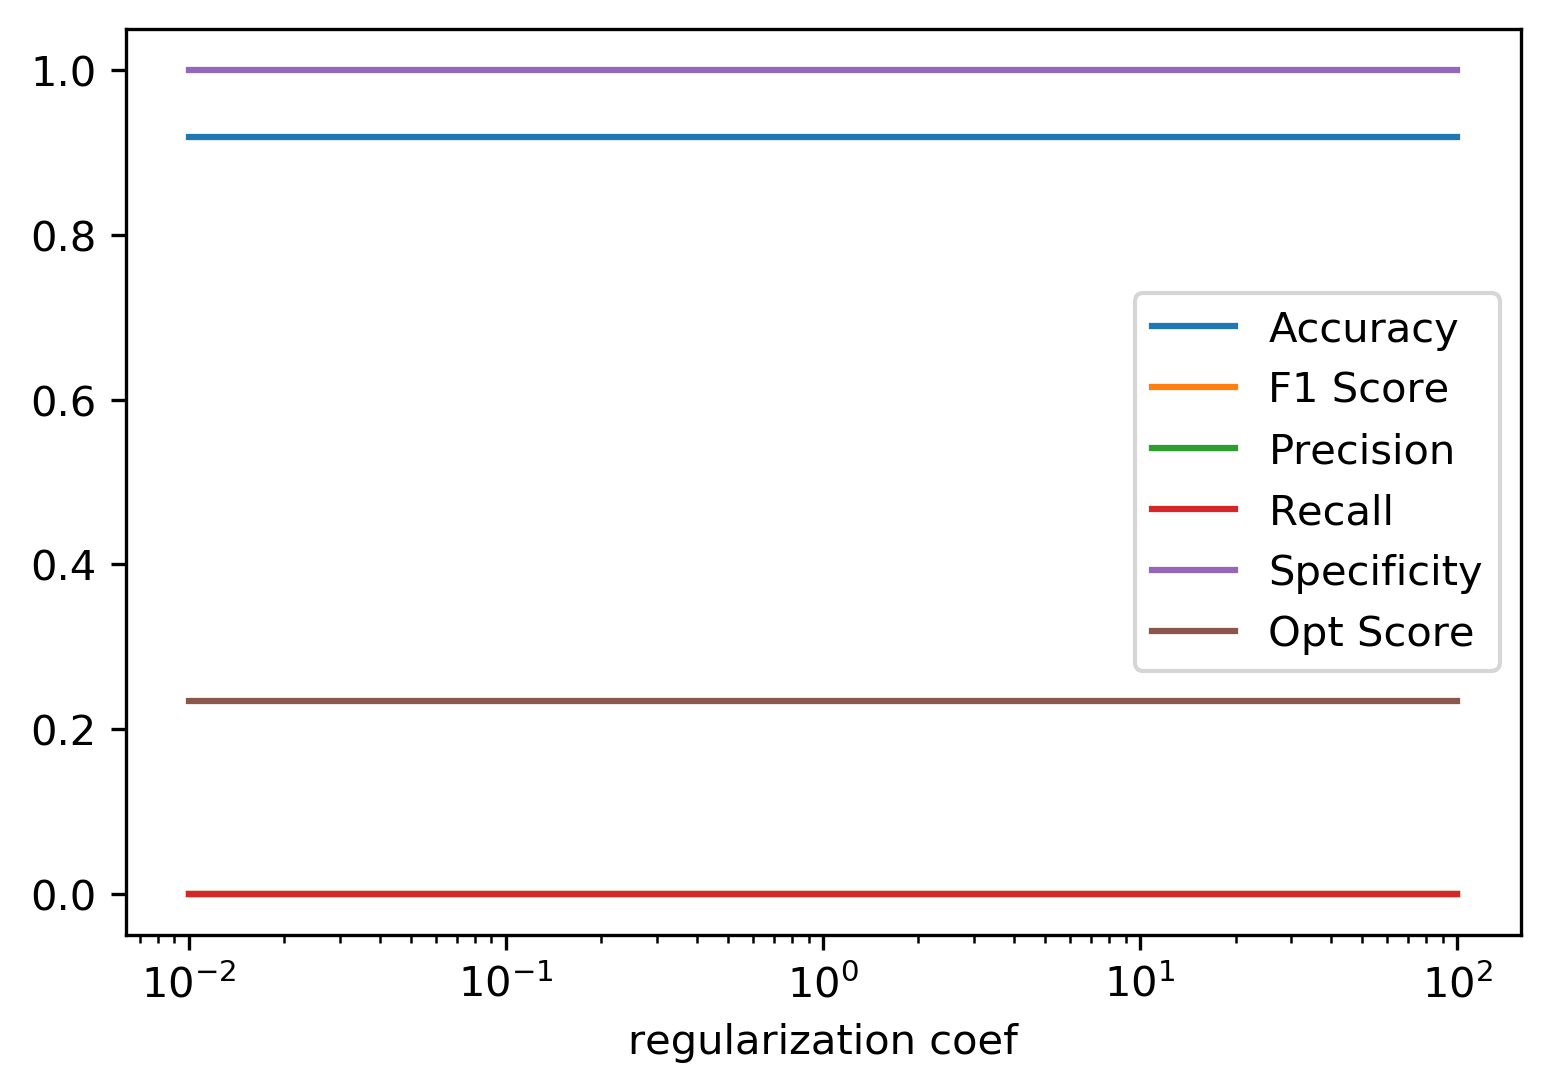

In [41]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_im1['C'], result_im1[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('im1.png', transparent = True)
plt.show()

In [21]:
print(LR_a)
print(max_score)

0.01
0.23424564999999975


--------------
no need

In [22]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('umbalanced1.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [23]:
LR_a2 = 0.0
max_score2 = 0.0

accuracies_im2 = []
recalls_im2 = []
f1s_im2 = []
precisions_im2 = []
opts_im2 = []
specificities_im2 = []

for i in np.logspace(-10,-5,10):
    sk_current = LogisticRegression(C = 1/i)
    sk_current.fit(xim_subtrain, yim_subtrain)
    sk_ypred = sk_current.predict(xim_valid)
    score = opt_score(yim_valid, sk_ypred)
    
    accuracies_im2.append(accuracy_score(yim_valid, sk_ypred))
    recalls_im2.append(recall_score(yim_valid, sk_ypred))
    f1s_im2.append(f1_score(yim_valid, sk_ypred))
    precisions_im2.append(precision_score(yim_valid, sk_ypred))
    specificities_im2.append(specificity_score(yim_valid, sk_ypred))
    opts_im2.append(score)
    
    if score > max_score2:
        max_score2 = score
        LR_a2 = i

In [24]:
print(LR_a2)
print(max_score2)

1e-10
0.9186732186732187
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


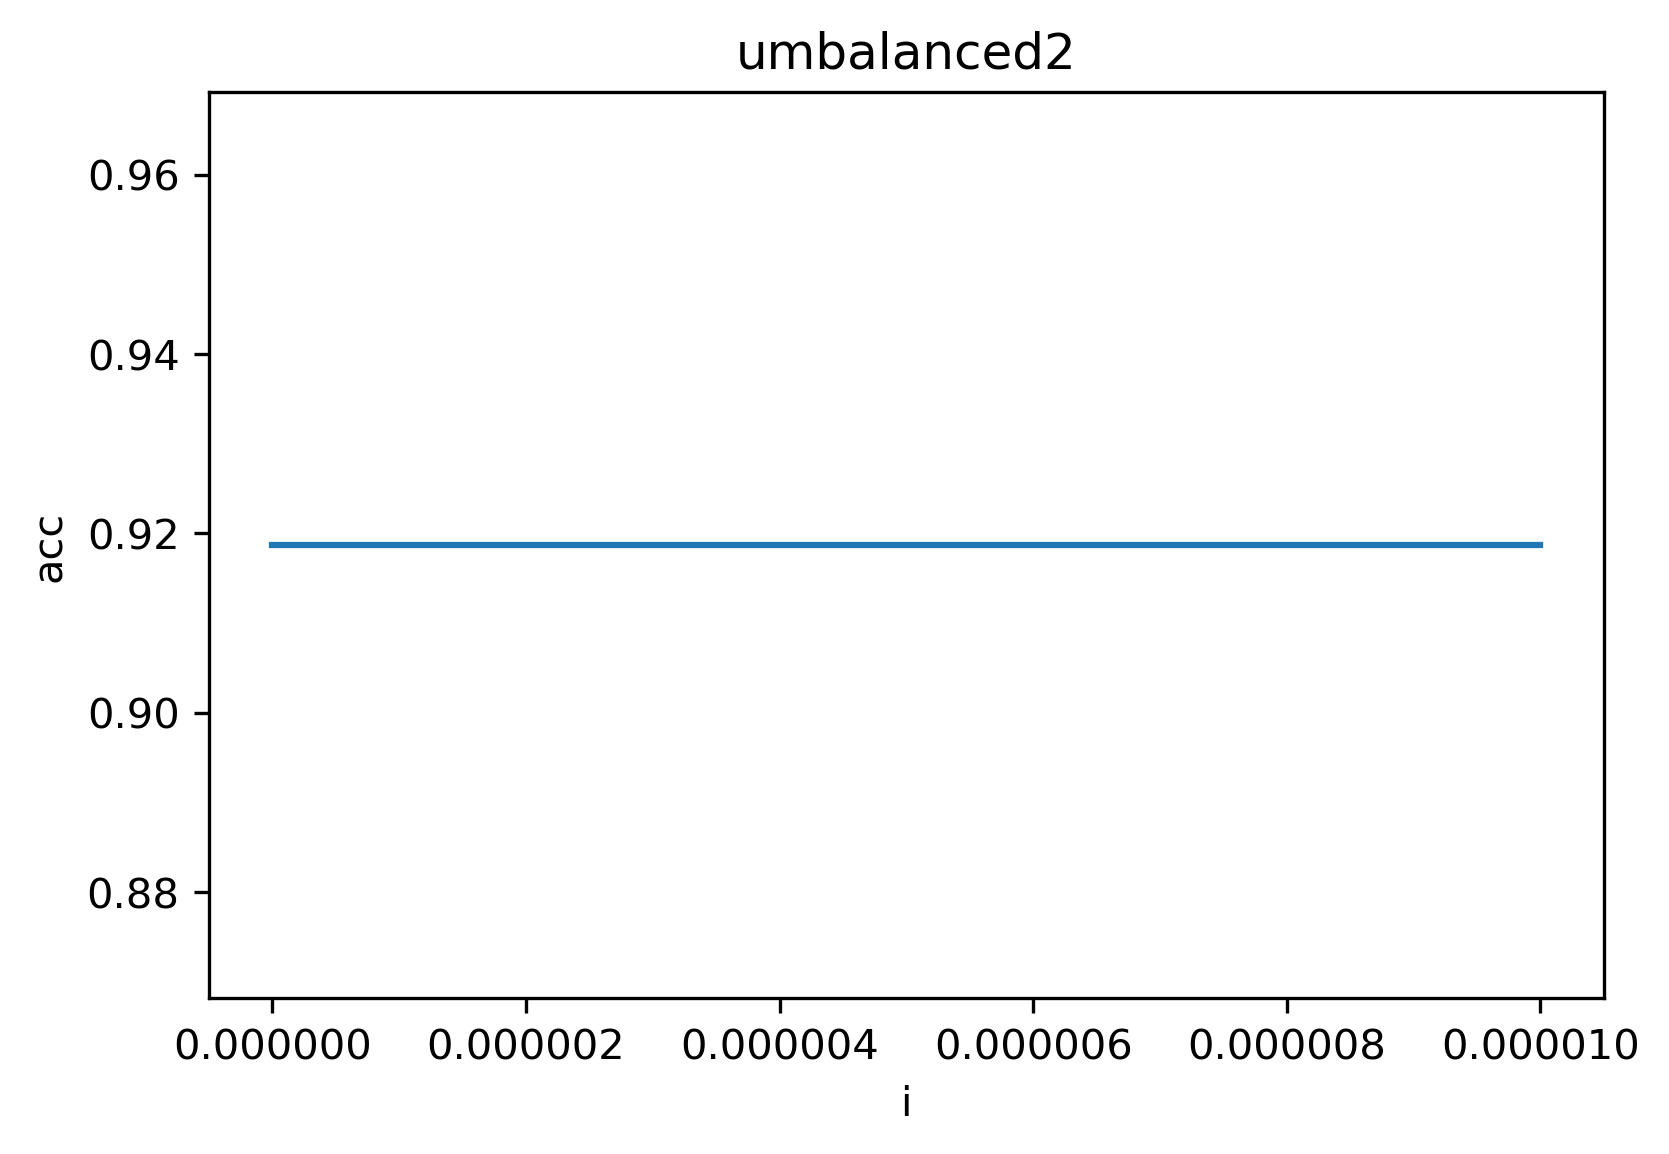

In [25]:
x2 = np.logspace(-10, -5, 10)
plt.plot(x2, all2_score)
plt.ylabel('score')
plt.xlabel('i')
plt.title('umbalanced2')
plt.show()

In [26]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('umbalanced2.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [27]:
LR_a3 = 0.0
max_score3 = 0.0
all3_score = []
allsum_pre3 = []
for i in np.logspace(5,10,10):
    sk_current = LogisticRegression(C = 1/i)
    sk_current.fit(xim_subtrain, yim_subtrain)
    sk_ypred = sk_current.predict(xim_valid)
    allsum_pre3.append(sum(sk_ypred))
    score = opt_score(yim_valid, sk_ypred)
    #f1 = precision_recall_fscore_support(yim_valid, sk_ypred, average='binary')[2]
    all3_score.append(score)
    if score > max_score3:
        max_score3 = score
        LR_a3 = i

In [28]:
print(LR_a3)
print(max_score3)
print(allsum_pre3)

100000.0
0.9186732186732187
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


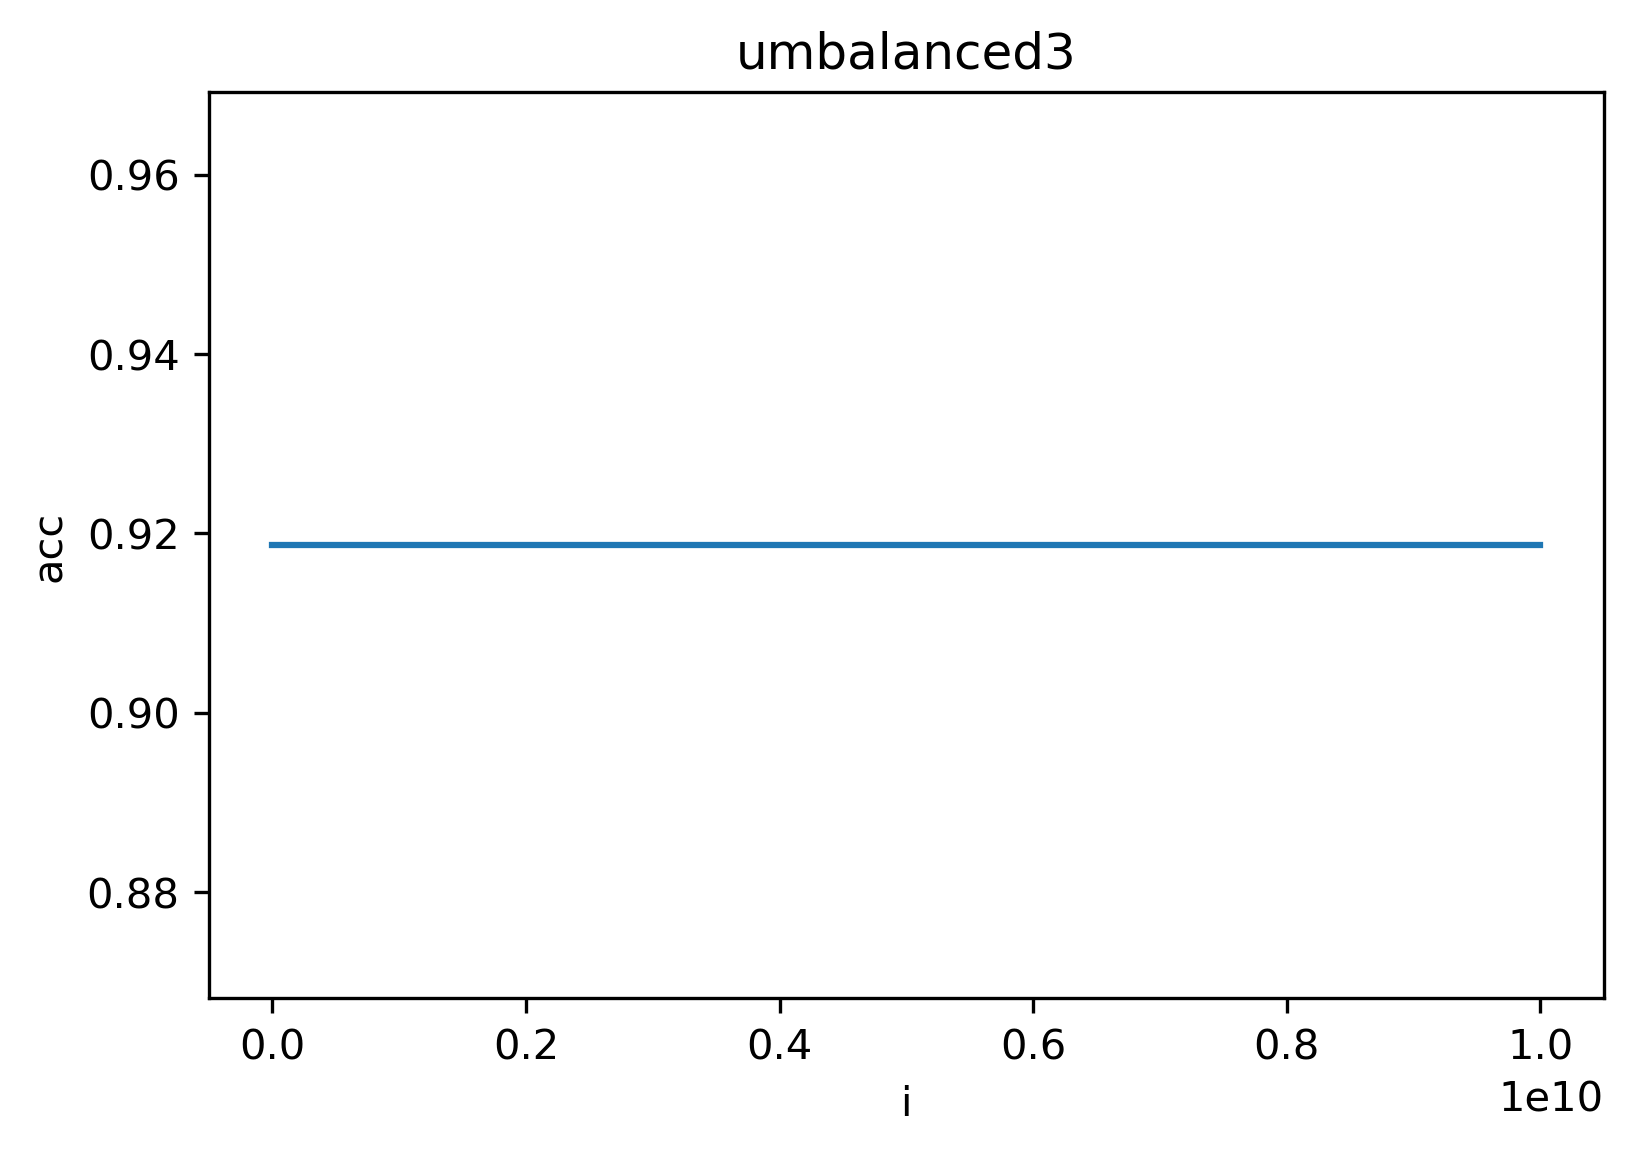

In [29]:
x3 = np.logspace(5, 10, 10)
plt.plot(x3, all3_score)
plt.ylabel('score')
plt.xlabel('i')
plt.title('umbalanced3')
plt.show()

In [30]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('umbalanced3.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

until here

-------

In [22]:
xim_train = np.r_[xim_subtrain, xim_valid]
yim_train = np.r_[yim_subtrain, yim_valid]

In [24]:
sk_current = LogisticRegression(C = 1/LR_a)
sk_current.fit(xim_train, yim_train)
joblib.dump(sk_current, 'imbalanced_model')
sk_ypred = sk_current.predict(xim_test)
score = opt_score(yim_test, sk_ypred)

accuracy_im = accuracy_score(yim_test, sk_ypred)
recall_im = recall_score(yim_test, sk_ypred)
f1_im = f1_score(yim_test, sk_ypred)
precision_im = 0
specificity_im = specificity_score(yim_test, sk_ypred)
opt_im = score

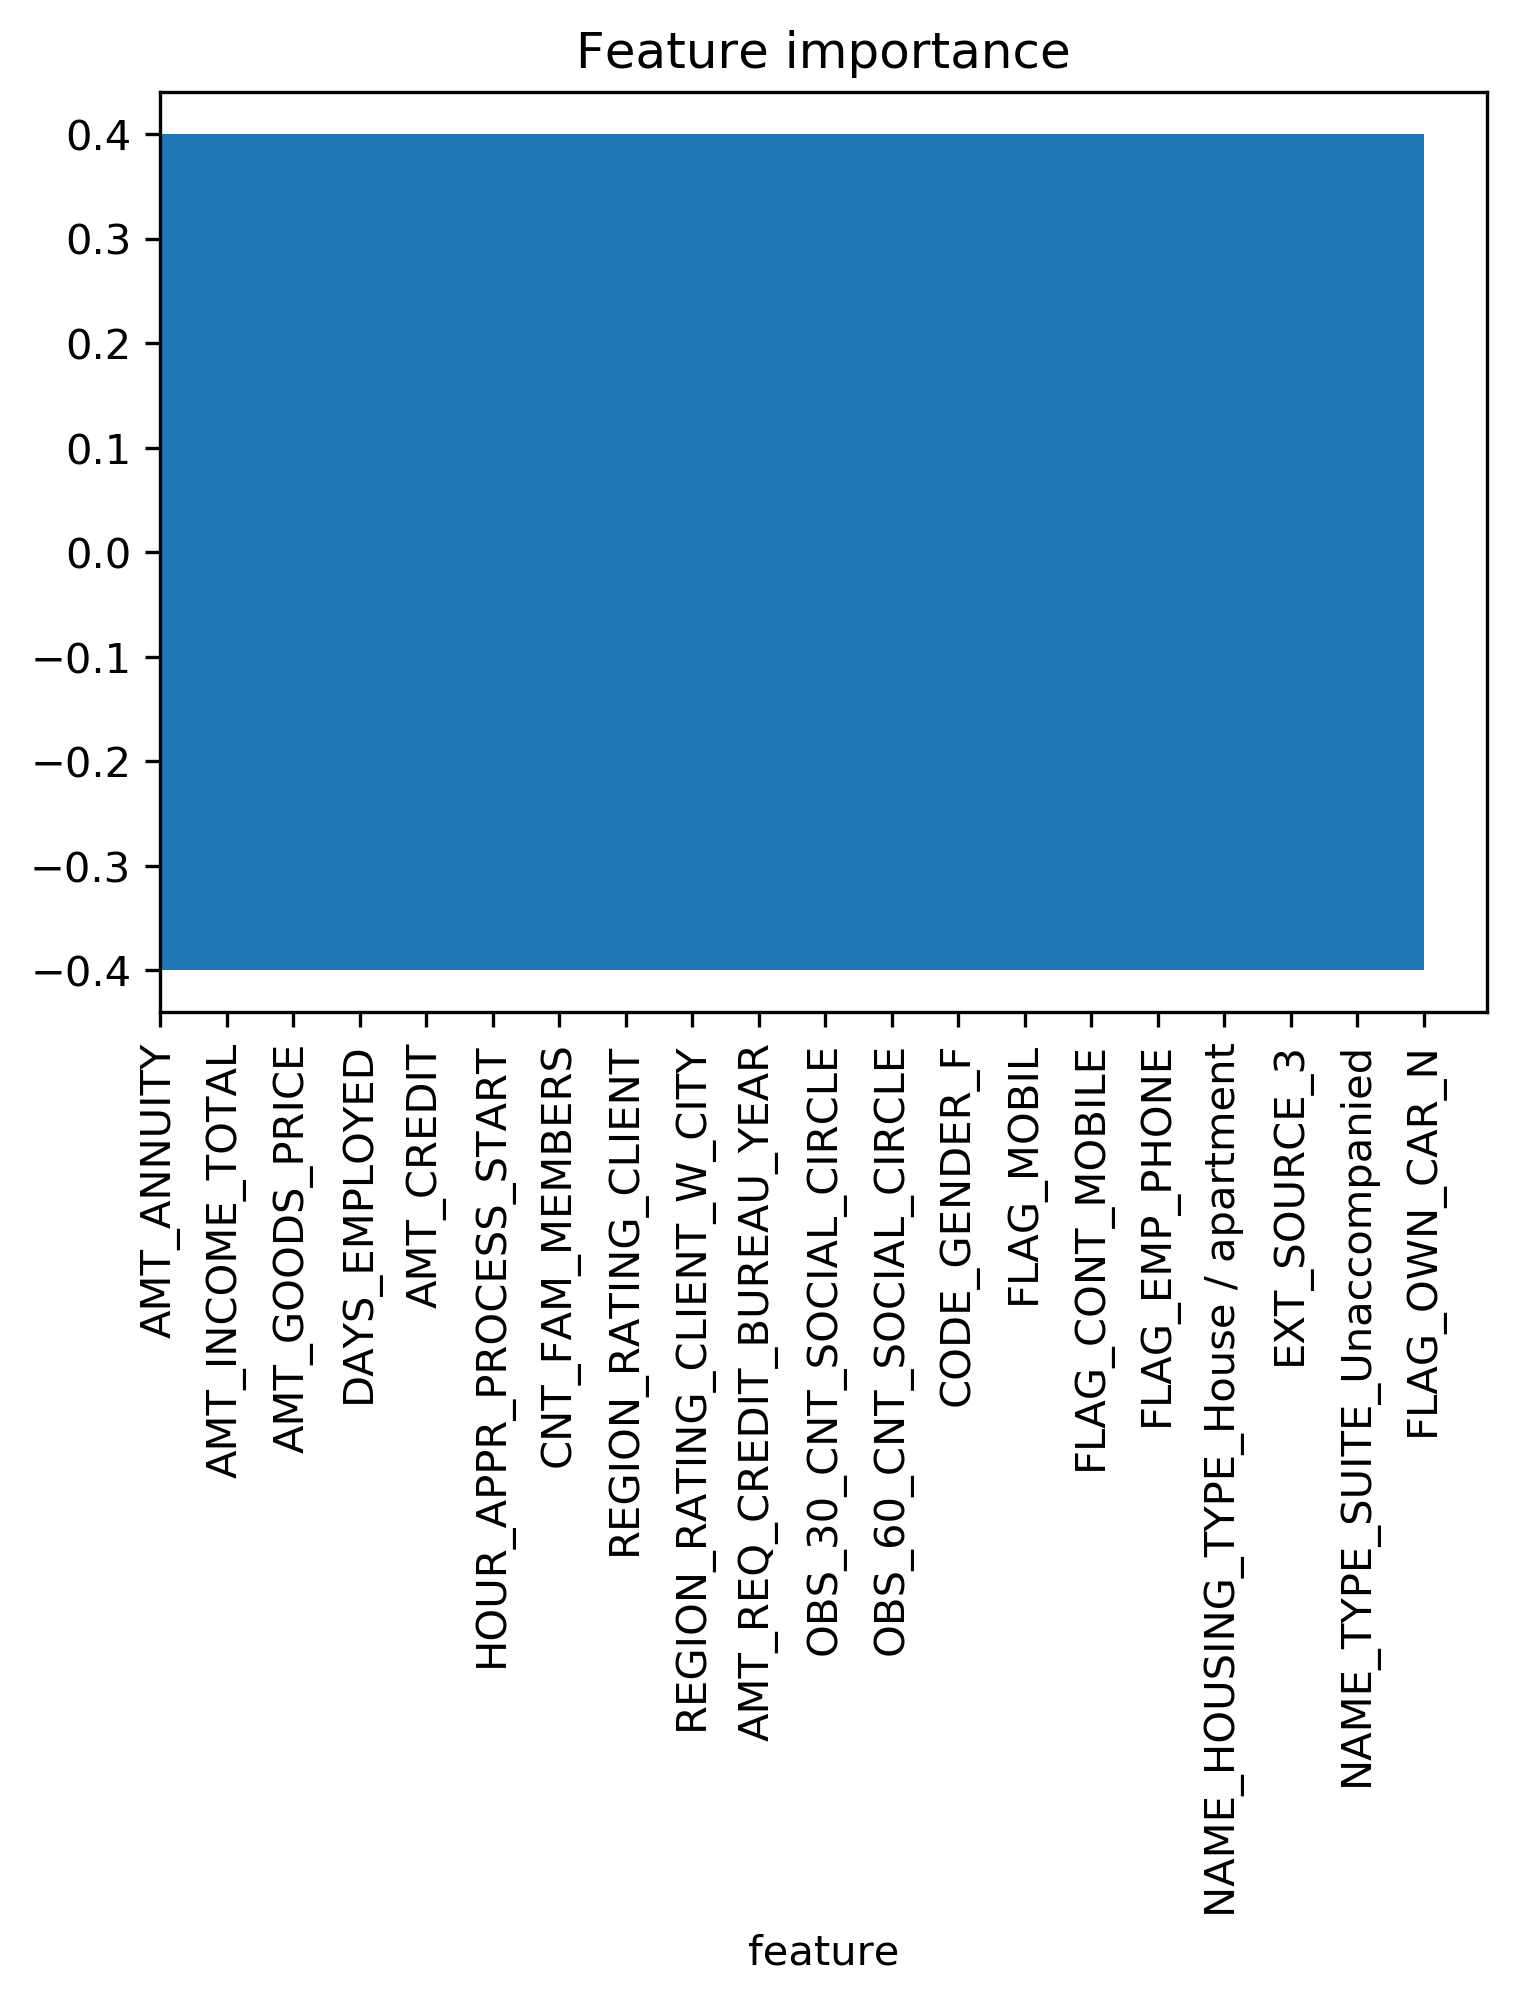

In [30]:
coef = sk_current.coef_[0].copy()
sorted_coef = sorted(range(len(coef)), key = lambda s: abs(coef[s]), reverse = True)
top20_f = []
top20_c = []
for i in range(20):
    top20_f.append(dff.columns[sorted_coef[i]])
    top20_c.append(coef[sorted_coef[i]])

plt.rcParams['figure.dpi'] = 300
plt.barh(top20_c, top20_f,)
plt.xlabel('feature')
plt.title('Feature importance')
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('important_features_im.png', transparent = True)
plt.show()

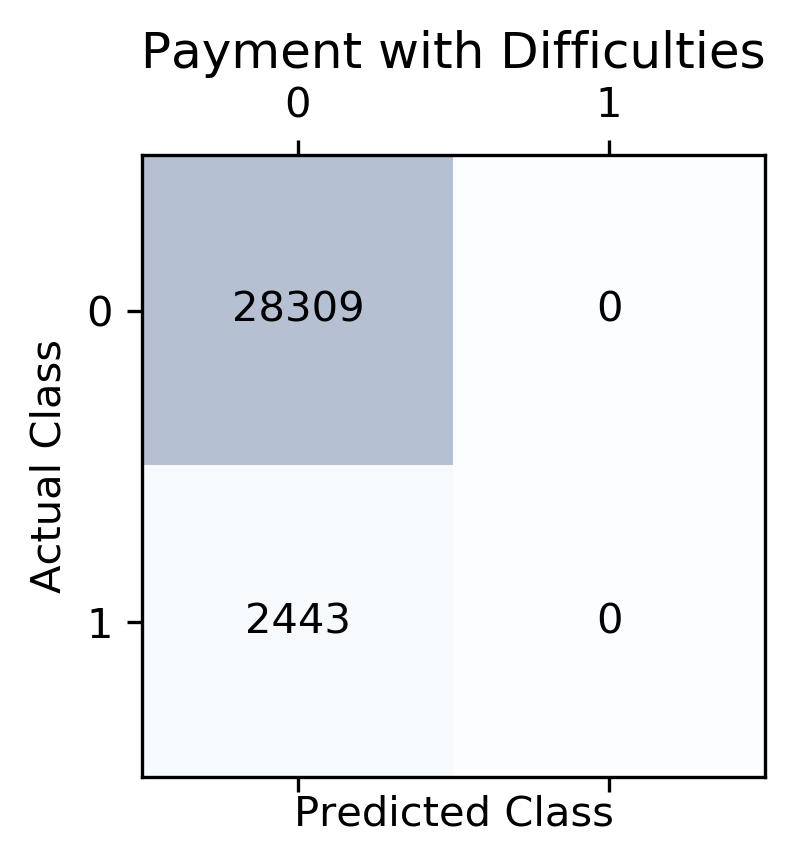

In [35]:
confmat = confusion_matrix(y_true=yim_test, y_pred=sk_ypred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Payment with Difficulties', y=1.1)
plt.tight_layout()
plt.savefig('imbalanced_confusion_matrix.png', transparent = True)
plt.show()

In [33]:
print("Accuracy: ", accuracy_im)
print("Recall: ", recall_im)
print("F1: ", f1_im)
print("Precision: ", precision_im)
print("Specificity: ", specificity_im)
print("Opt score: ", opt_im)

Accuracy:  0.9205580124869928
Recall:  0.0
F1:  0.0
Precision:  0
Specificity:  1.0
Opt score:  0.23424564999999975


AUC: 0.599725


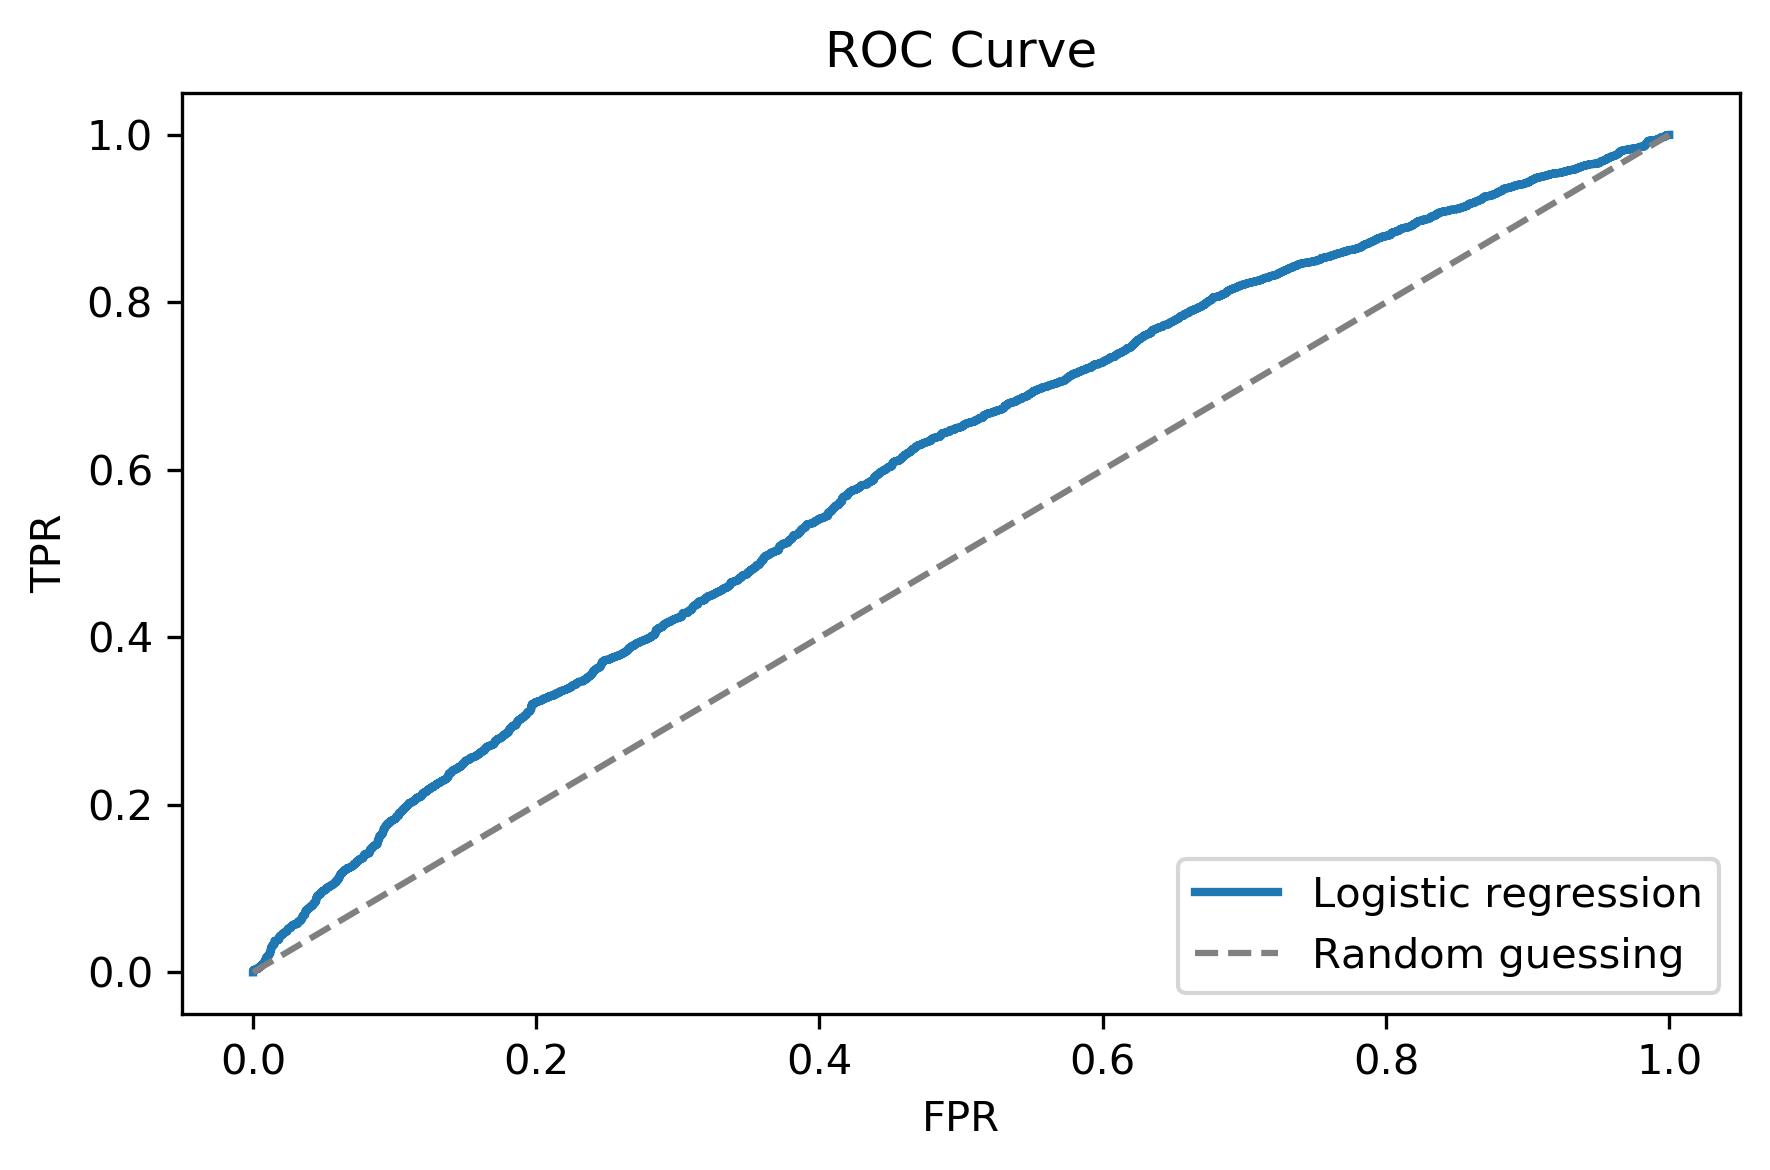

In [43]:
probas = sk_current.predict_proba(xim_test)
fpr, tpr, thresholds = roc_curve(yim_test, probas[:, 0], pos_label=0)
print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2, label='Logistic regression')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
#plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray', label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC_im.png', transparent = True)
plt.show()

### using balanced data (under sampling)

In [36]:
file = open('balanced_data_under_sampling.pickle', 'rb')
df2 = pickle.load(file)
file.close()

In [37]:
display(df2)

{'X_subtrain': array([[2.000000e+00, 9.000000e+04, 1.350000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.800000e+05, 1.885536e+06, ..., 0.000000e+00,
         0.000000e+00, 1.000000e+00],
        [0.000000e+00, 6.075000e+04, 3.270240e+05, ..., 0.000000e+00,
         0.000000e+00, 1.000000e+00],
        ...,
        [1.000000e+00, 8.100000e+04, 1.332000e+06, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.000000e+00, 1.305000e+05, 1.288350e+06, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.800000e+05, 1.048500e+06, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00]]),
 'X_valid': array([[0.000000e+00, 2.700000e+05, 7.908300e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 5.400000e+04, 2.250000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 2.115000e+05, 7.819200e+05, ..., 0.000000e+00,
         0.000000e+00, 0.0

In [38]:
xbu_subtrain = df2['X_subtrain']
xbu_valid = df2['X_valid']
xbu_test = df2['X_test']
ybu_subtrain = df2['y_subtrain']
ybu_valid = df2['y_valid']
ybu_test = df2['y_test']

In [39]:
LR_bu = 0.0
max_score_bu = 0.0

accuracies_bu1 = []
recalls_bu1 = []
f1s_bu1 = []
precisions_bu1 = []
opts_bu1 = []
specificities_bu1 = []

for i in np.logspace(8,12,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbu_valid)
    score = opt_score(ybu_valid, sk_ypred)
    
    accuracies_bu1.append(accuracy_score(ybu_valid, sk_ypred))
    recalls_bu1.append(recall_score(ybu_valid, sk_ypred))
    f1s_bu1.append(f1_score(ybu_valid, sk_ypred))
    precisions_bu1.append(precision_score(ybu_valid, sk_ypred))
    specificities_bu1.append(specificity_score(ybu_valid, sk_ypred))
    opts_bu1.append(score)
    
    if score > max_score_bu:
        max_score_bu = score
        LR_bu = i

In [44]:
result_bu1 = pd.DataFrame()
result_bu1['C'] = np.logspace(8,12,20)
result_bu1['Accuracy'] = accuracies_bu1
result_bu1['Precision'] = precisions_bu1
result_bu1['Recall'] = recalls_bu1
result_bu1['F1 Score'] = f1s_bu1
result_bu1['Specificity'] = specificities_bu1
result_bu1['Opt Score'] = opts_bu1

display(result_bu1)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+08,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
1,1.623777e+08,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
2,2.636651e+08,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
3,4.281332e+08,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
4,6.951928e+08,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
5,1.128838e+09,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
6,1.832981e+09,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
7,2.976351e+09,0.567669,0.561581,0.597949,0.579195,0.537680,0.411855
8,4.832930e+09,0.567669,0.561581,0.597949,0.579195,0.537680,0.411855
9,7.847600e+09,0.567669,0.561581,0.597949,0.579195,0.537680,0.411855


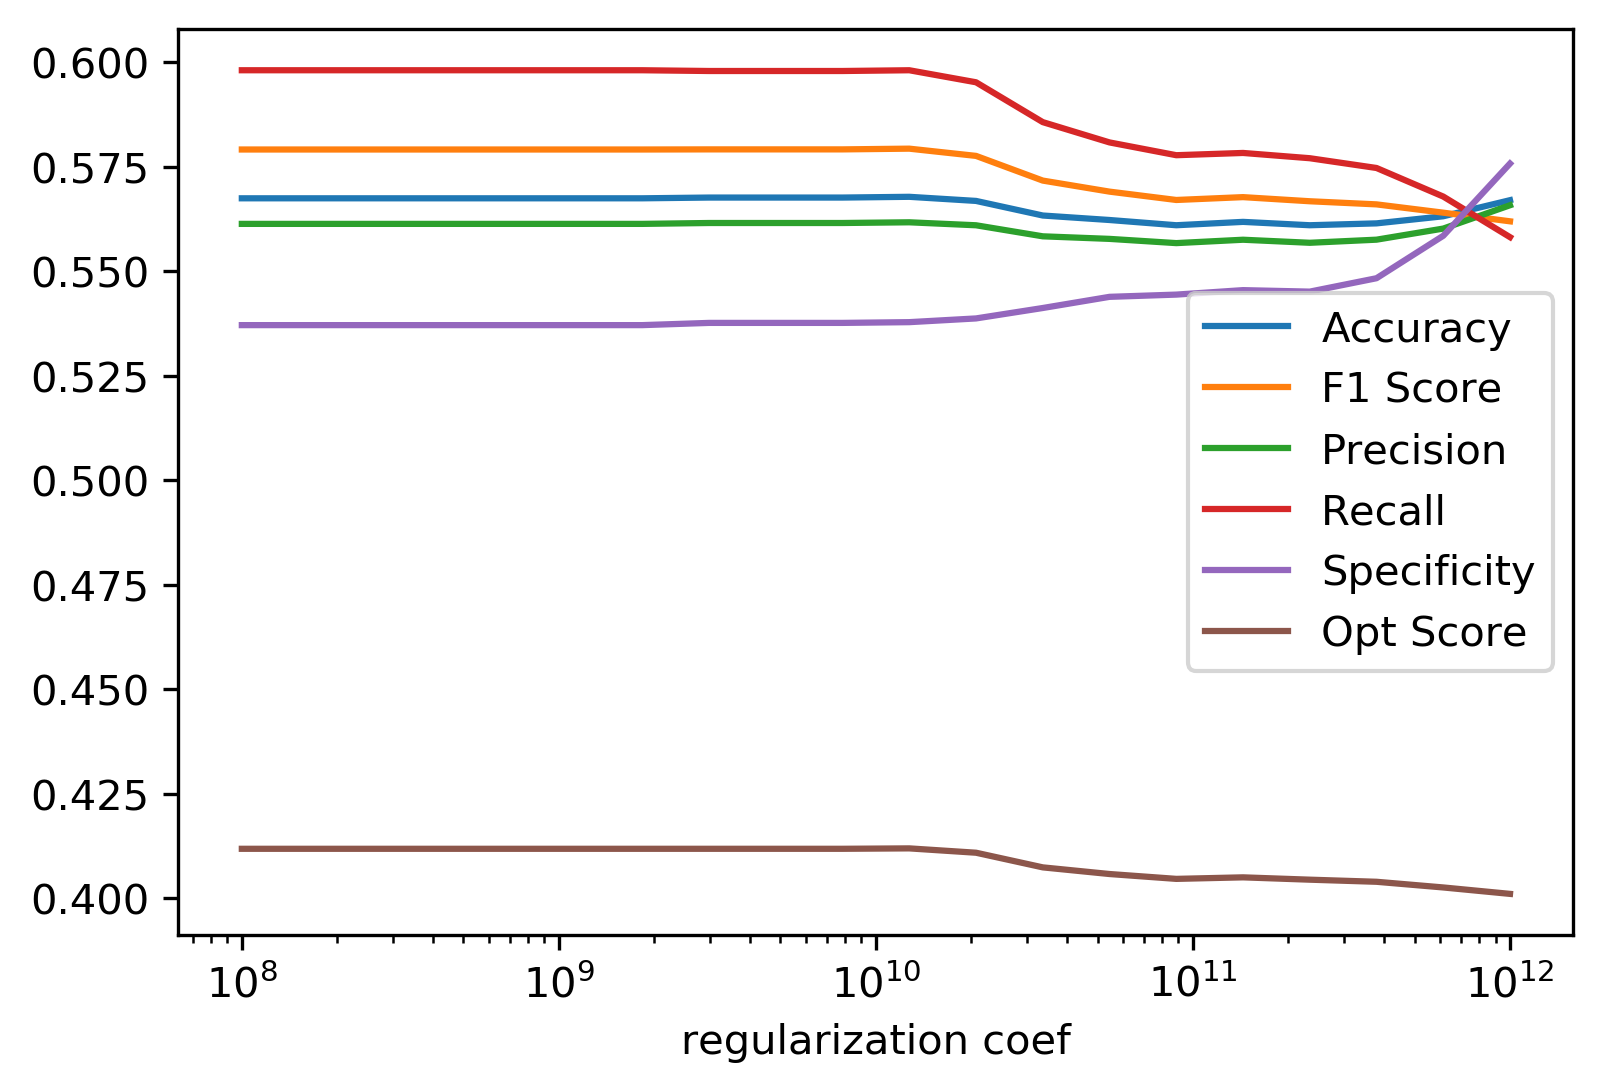

In [45]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bu1['C'], result_bu1[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bu1.png', transparent = True)
plt.show()

In [46]:
print(LR_bu)
print(max_score_bu)

12742749857.03132
0.4119525088129051


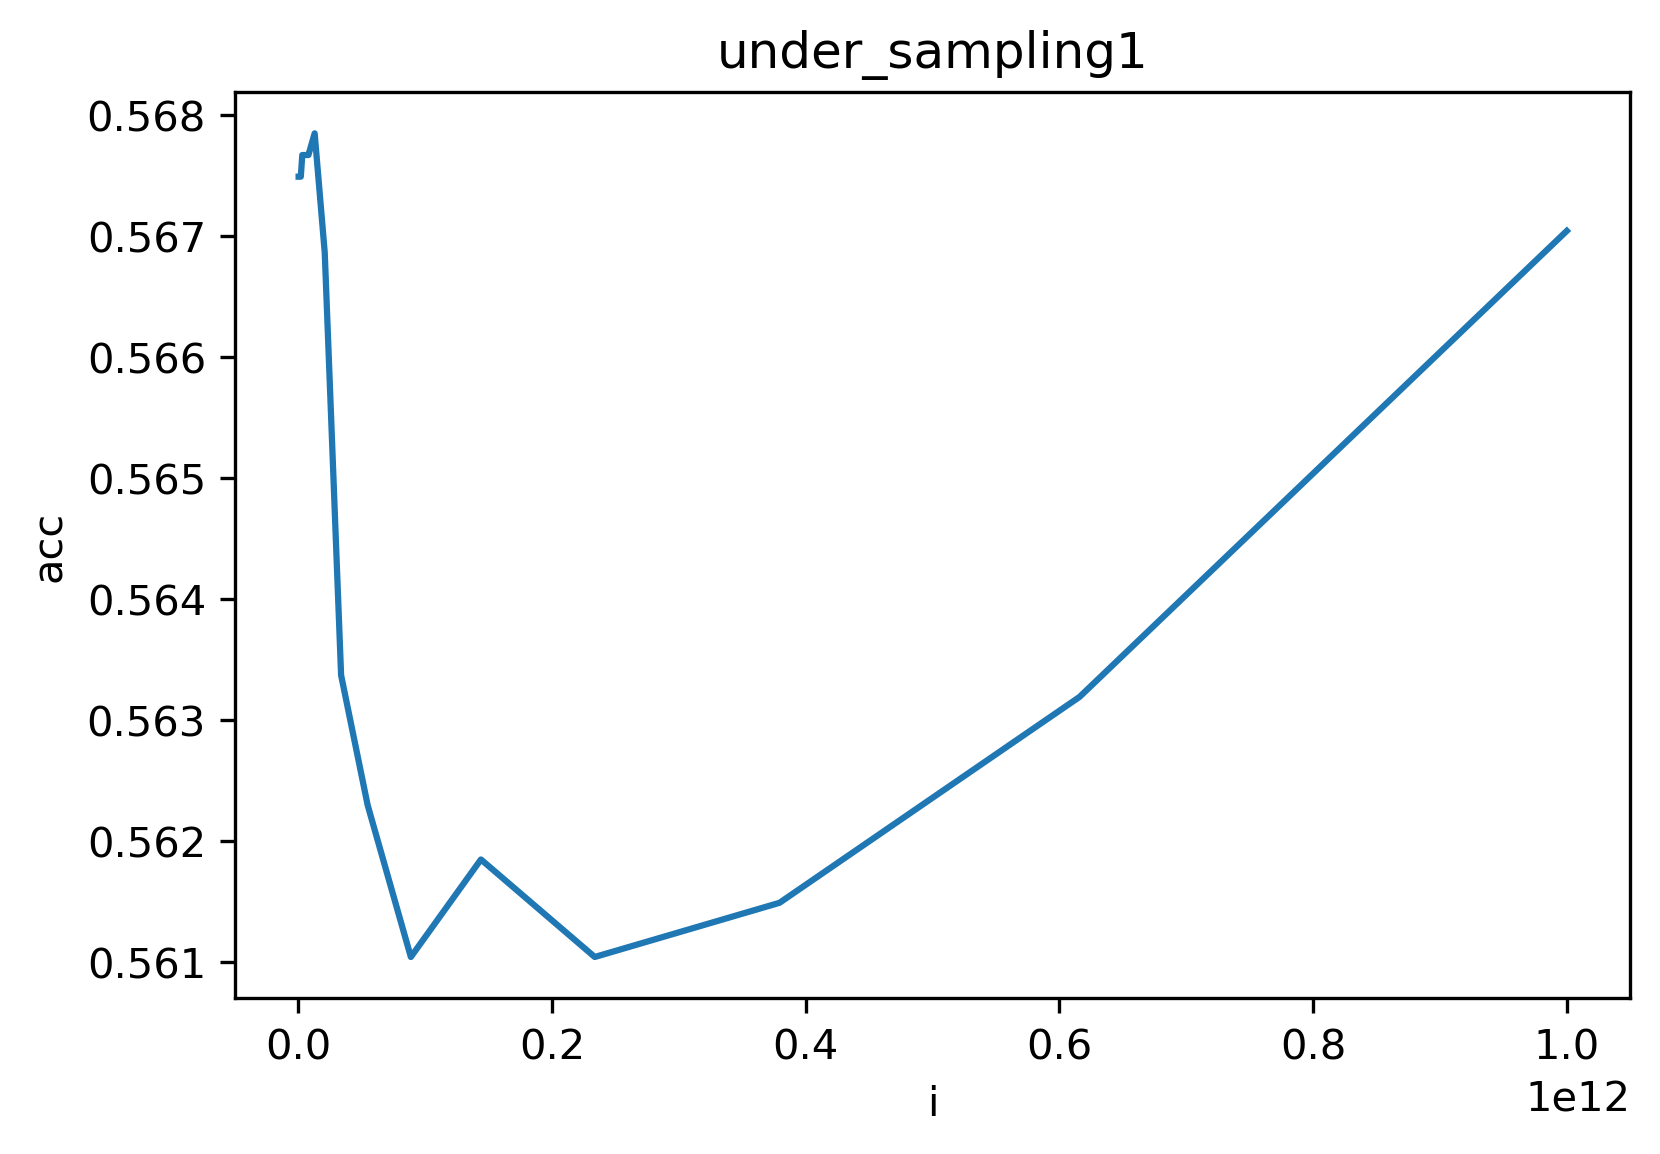

In [40]:
x1 = np.logspace(8, 12, 20)
plt.plot(x1, all1_acc)
plt.ylabel('acc')
plt.xlabel('i')
plt.title('under_sampling1')
plt.show()

In [41]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('under_sampling1.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [56]:
LR_bu2 = 0.0
max_score_bu2 = 0.0

accuracies_bu2 = []
recalls_bu2 = []
f1s_bu2 = []
precisions_bu2 = []
opts_bu2 = []
specificities_bu2 = []

for i in np.logspace(9,15,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbu_valid)
    score = opt_score(ybu_valid, sk_ypred)
    
    accuracies_bu2.append(accuracy_score(ybu_valid, sk_ypred))
    recalls_bu2.append(recall_score(ybu_valid, sk_ypred))
    f1s_bu2.append(f1_score(ybu_valid, sk_ypred))
    precisions_bu2.append(precision_score(ybu_valid, sk_ypred))
    specificities_bu2.append(specificity_score(ybu_valid, sk_ypred))
    opts_bu2.append(score)
    
    if score > max_score_bu2:
        max_score_bu2 = score
        LR_bu2 = i

In [57]:
result_bu2 = pd.DataFrame()
result_bu2['C'] = np.logspace(9,15,20)
result_bu2['Accuracy'] = accuracies_bu2
result_bu2['Precision'] = precisions_bu2
result_bu2['Recall'] = recalls_bu2
result_bu2['F1 Score'] = f1s_bu2
result_bu2['Specificity'] = specificities_bu2
result_bu2['Opt Score'] = opts_bu2

display(result_bu2)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+09,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
1,2.069138e+09,0.567490,0.561371,0.598129,0.579167,0.537146,0.411854
2,4.281332e+09,0.567669,0.561581,0.597949,0.579195,0.537680,0.411855
3,8.858668e+09,0.567759,0.561655,0.598129,0.579319,0.537680,0.411928
4,1.832981e+10,0.567222,0.561273,0.596510,0.578355,0.538215,0.411348
5,3.792690e+10,0.562746,0.557884,0.584278,0.570776,0.541422,0.406853
6,7.847600e+10,0.561404,0.557116,0.578162,0.567444,0.544807,0.404851
7,1.623777e+11,0.561851,0.557519,0.578881,0.567999,0.544985,0.405166
8,3.359818e+11,0.561583,0.557568,0.575823,0.566549,0.547479,0.404275
9,6.951928e+11,0.564626,0.561976,0.566829,0.564392,0.562444,0.402708


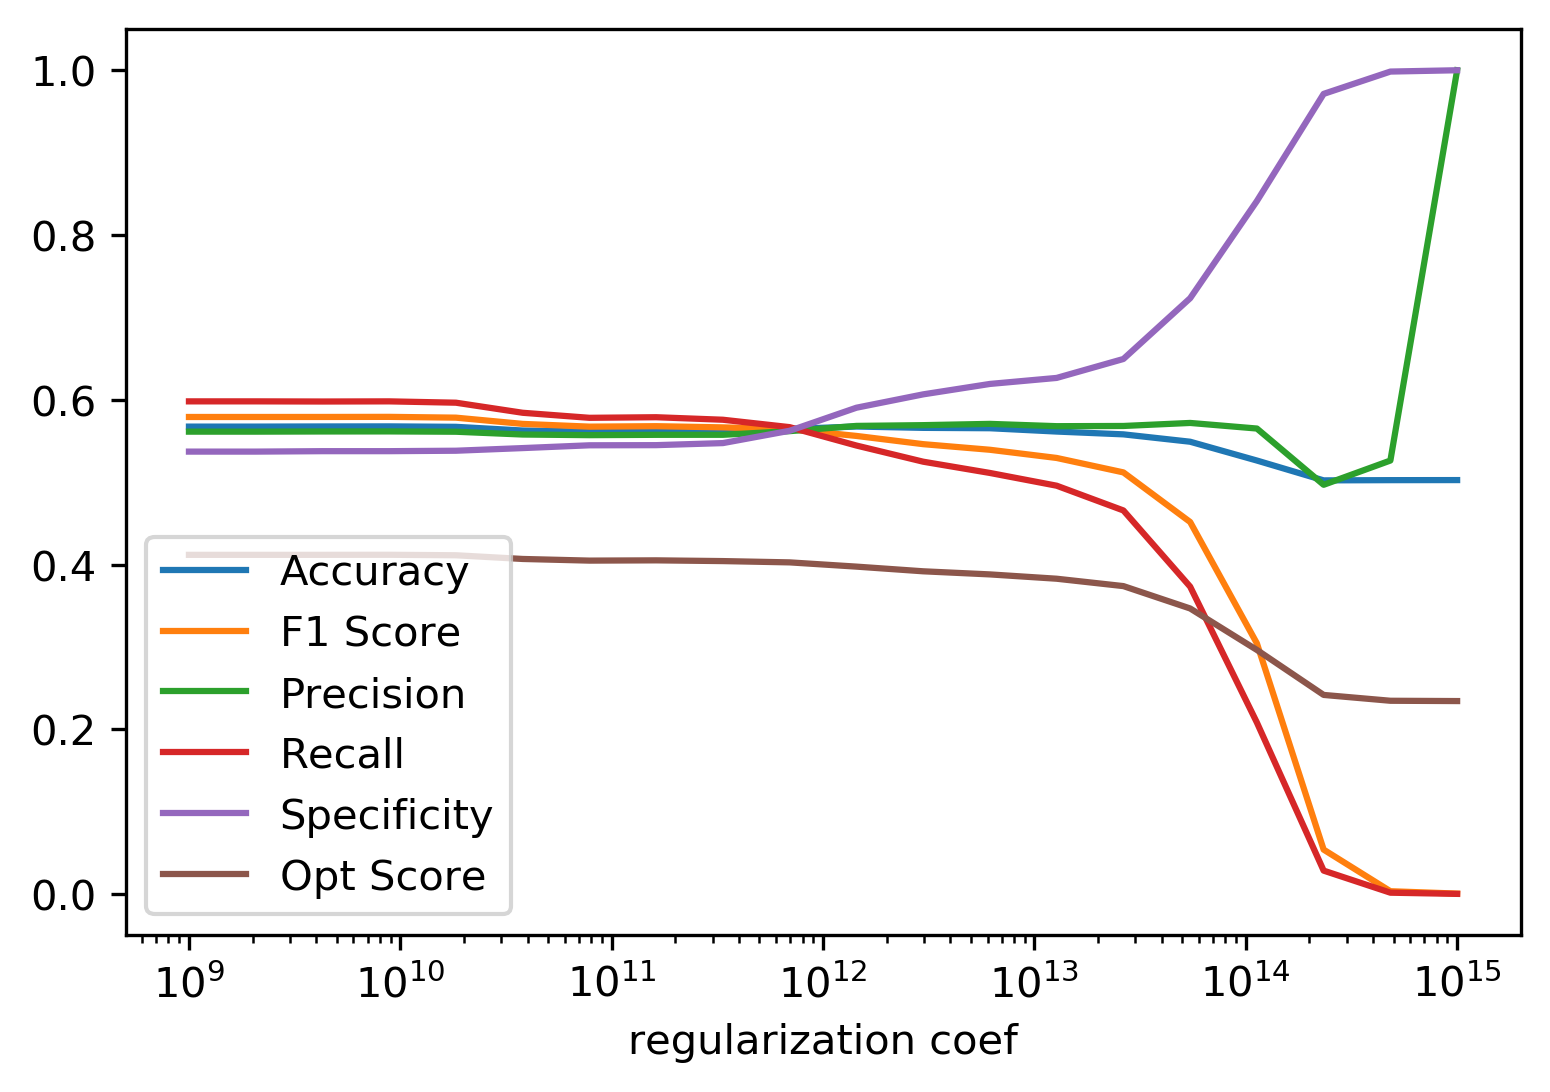

In [58]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bu2['C'], result_bu2[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bu2.png', transparent = True)
plt.show()

In [59]:
print(LR_bu2)
print(max_score_bu2)

8858667904.100832
0.41192794251146214


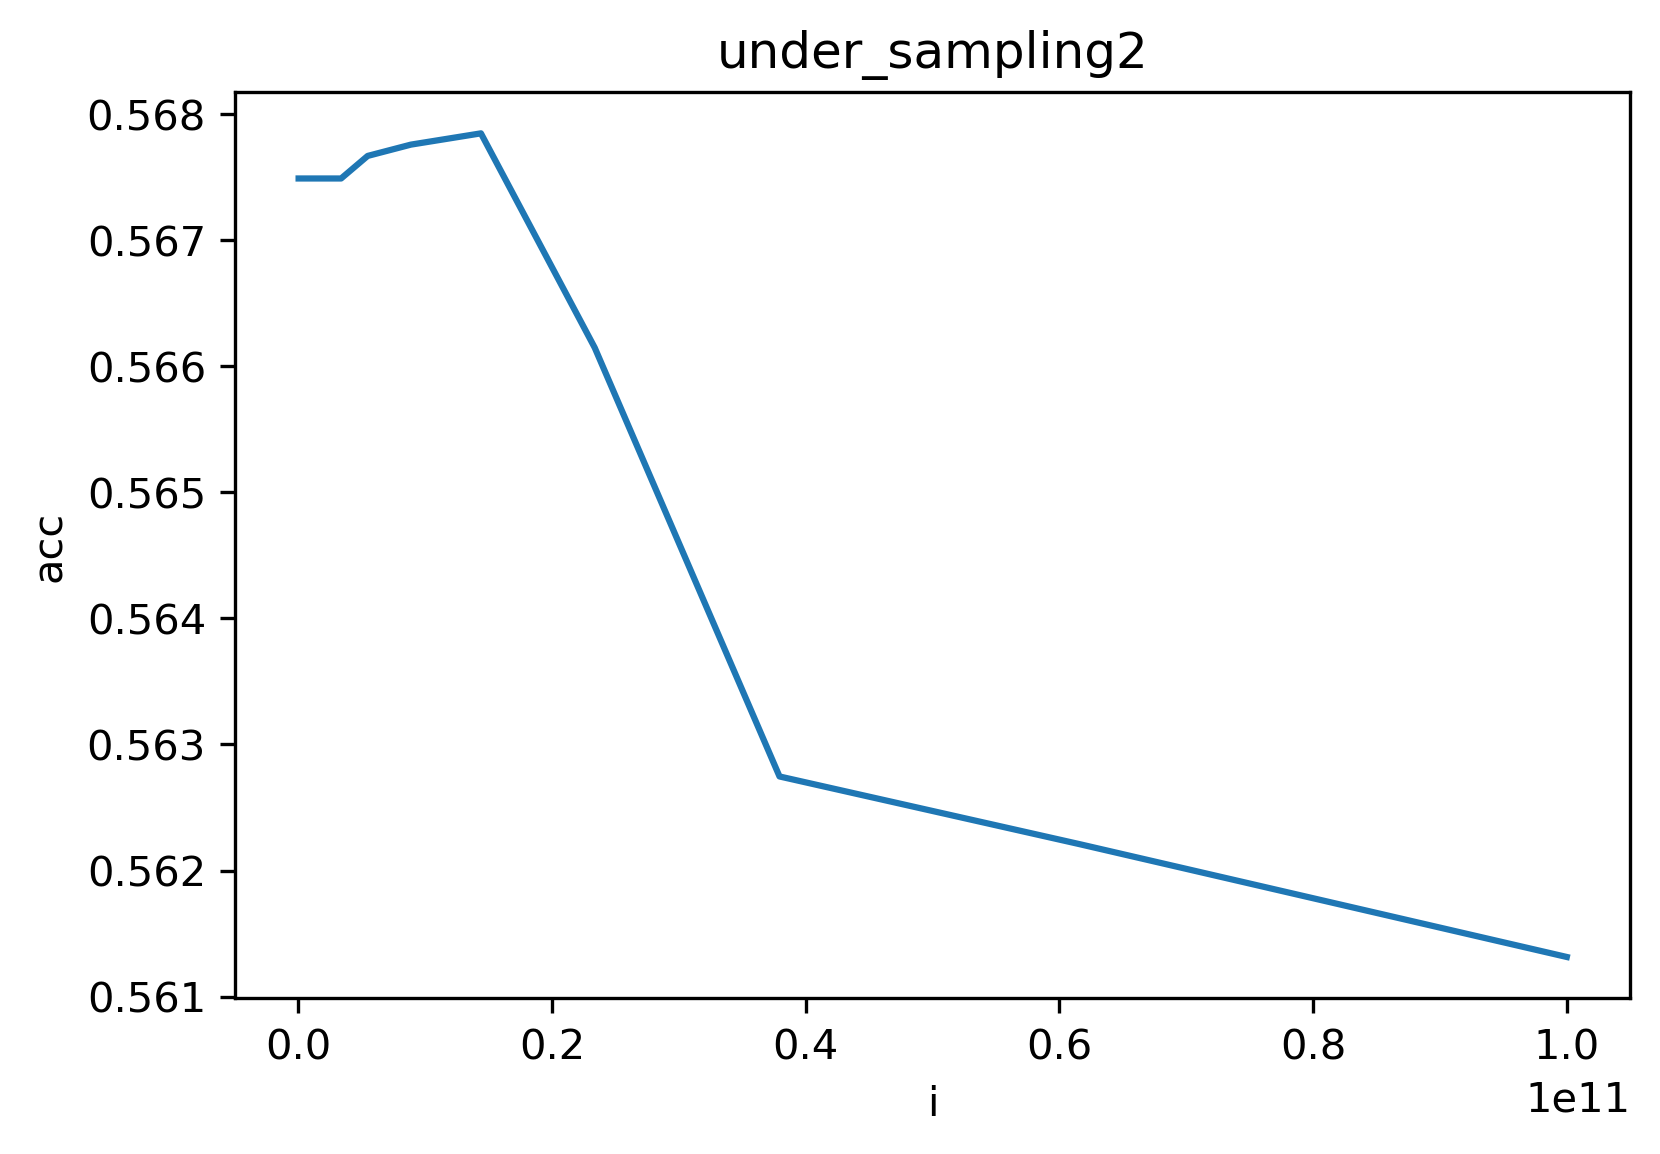

In [44]:
x2 = np.logspace(7, 11, 20)
plt.plot(x2, all2_acc)
plt.ylabel('acc')
plt.xlabel('i')
plt.title('under_sampling2')
plt.show()

In [45]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('under_sampling2.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [60]:
xbu_train = np.r_[xbu_subtrain, xbu_valid]
ybu_train = np.r_[ybu_subtrain, ybu_valid]

In [61]:
sk_current = LogisticRegression(C = 1/LR_bu).fit(xbu_train, ybu_train)
joblib.dump(sk_current, 'undersampling_model')
sk_ypred = sk_current.predict(xbu_test)
score = opt_score(ybu_test, sk_ypred)

accuracy_bu = accuracy_score(ybu_test, sk_ypred)
recall_bu = recall_score(ybu_test, sk_ypred)
f1_bu = f1_score(ybu_test, sk_ypred)
precision_bu = precision_score(ybu_test, sk_ypred)
specificity_bu = specificity_score(ybu_test, sk_ypred)
opt_bu = score

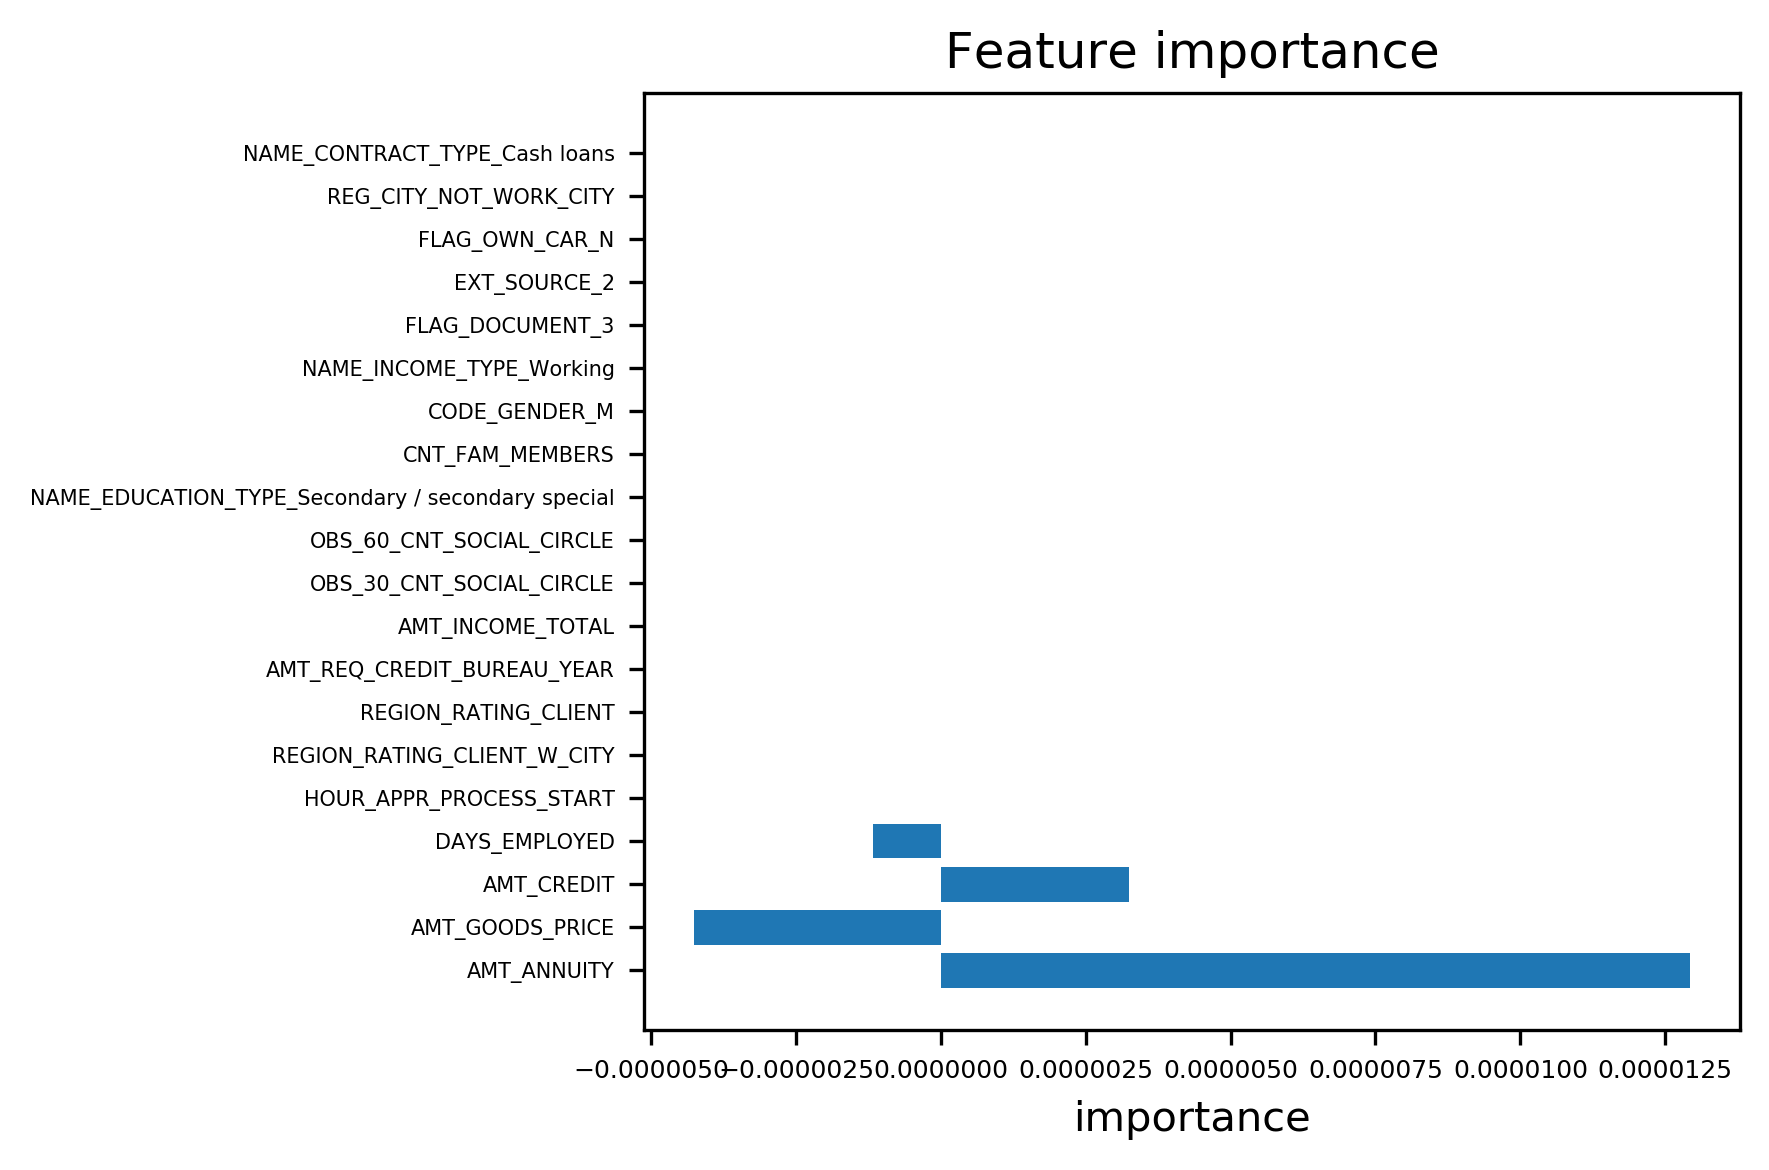

In [97]:
coef = sk_current.coef_[0].copy()
sorted_coef = sorted(range(len(coef)), key = lambda s: abs(coef[s]), reverse = True)
top20_f = []
top20_c = []
for i in range(20):
    top20_f.append(dff.columns[sorted_coef[i]])
    top20_c.append(coef[sorted_coef[i]])

plt.rcParams['figure.dpi'] = 300
plt.barh(top20_f, top20_c,)
plt.xlabel('importance')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.title('Feature importance')
plt.tight_layout()
plt.savefig('important_features_bu.png', transparent = True)
plt.show()

In [69]:
top20_c

[1.2929573755375558e-05,
 -4.263271015574008e-06,
 3.242346773113296e-06,
 -1.162215216631636e-06,
 4.18027038228179e-09,
 2.4786715673679843e-09,
 2.4416286413505623e-09,
 2.3849128885397574e-09,
 2.0288990245630902e-09,
 1.8281177267987431e-09,
 1.8043234893390325e-09,
 1.3842115796847922e-09,
 1.3639033474579375e-09,
 1.165703084693795e-09,
 1.0785249409217466e-09,
 9.878572365294705e-10,
 -9.414573135394382e-10,
 9.082076881097706e-10,
 8.755333907136022e-10,
 8.545889932955249e-10]

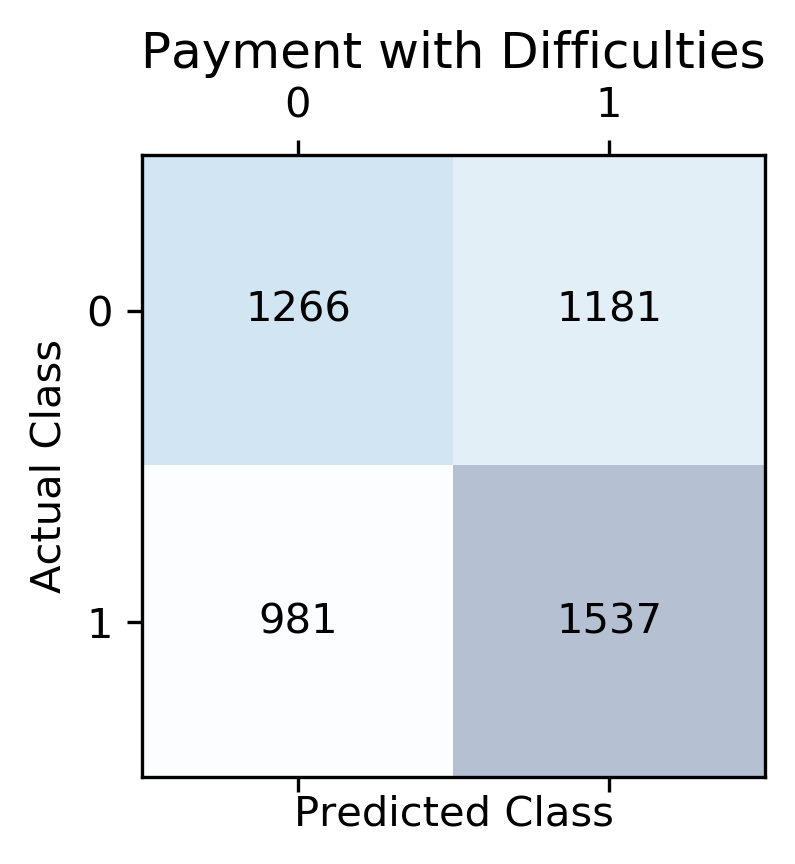

In [73]:
confmat = confusion_matrix(y_true=ybu_test, y_pred=sk_ypred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Payment with Difficulties', y=1.1)
plt.tight_layout()
plt.savefig('undersampling_confusion_matrix.png', transparent = True)
plt.show()

AUC: 0.594166


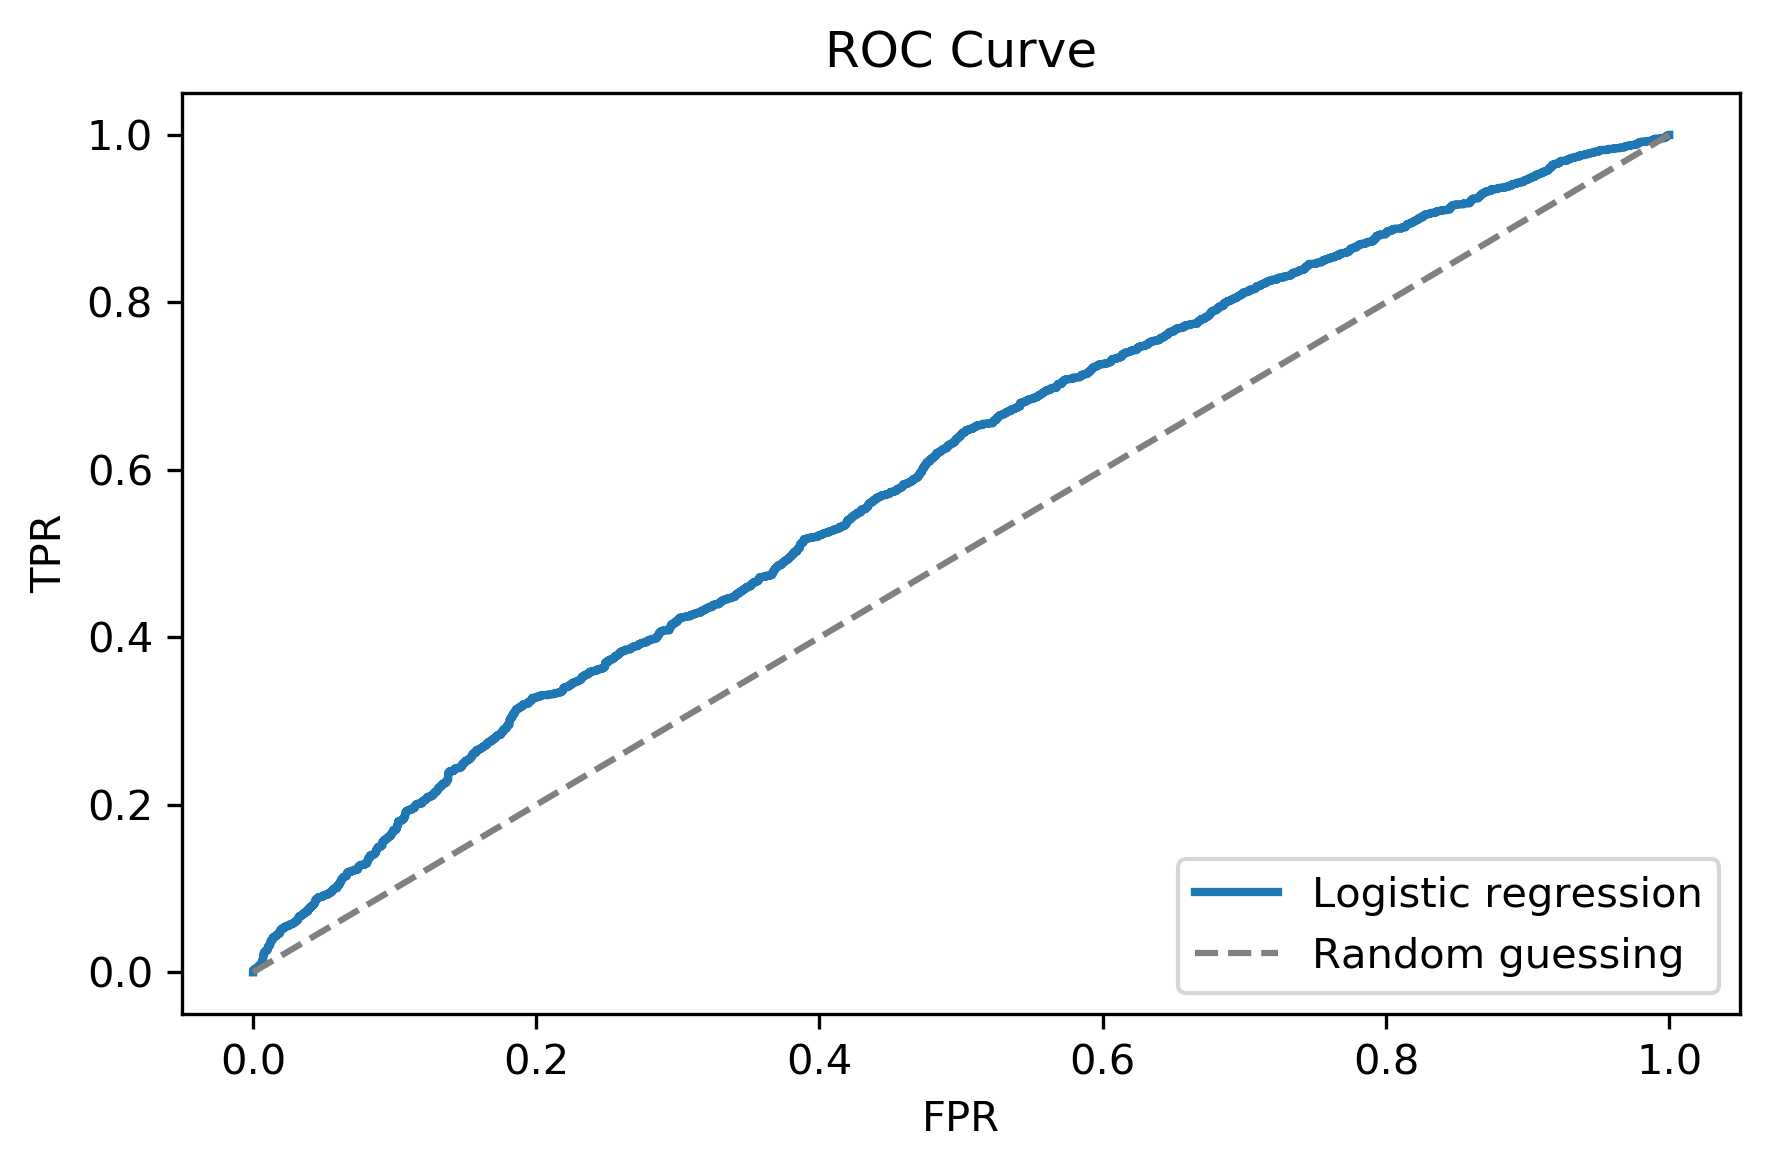

In [74]:
probas = sk_current.predict_proba(xbu_test)
fpr, tpr, thresholds = roc_curve(ybu_test, probas[:, 0], pos_label=0)
print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2, label='Logistic regression')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
#plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray', label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC_bu.png', transparent = True)
plt.show()

In [76]:
print("Accuracy: ", accuracy_bu)
print("Recall: ", recall_bu)
print("F1: ", f1_bu)
print("Precision: ", precision_bu)
print("Specificity: ", specificity_bu)
print("Opt score: ", opt_bu)

Accuracy:  0.564551863041289
Recall:  0.6104050833995235
F1:  0.5870893812070282
Precision:  0.5654893303899926
Specificity:  0.5173682059664896
Opt score:  0.4140821980988537


### using balanced data (over sampling)

In [98]:
file = open('balanced_data_over_sampling.pickle', 'rb')
df3 = pickle.load(file)
file.close()

In [99]:
display(df3)

{'X_subtrain': array([[1.000000e+00, 4.500000e+05, 7.551900e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.800000e+05, 5.925600e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.575000e+05, 5.850000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        ...,
        [0.000000e+00, 5.850000e+04, 9.765000e+05, ..., 0.000000e+00,
         0.000000e+00, 1.000000e+00],
        [1.000000e+00, 9.000000e+04, 8.086500e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 9.000000e+04, 5.084955e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00]]),
 'X_valid': array([[0.000000e+00, 2.250000e+05, 6.300000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.350000e+05, 5.430375e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.305000e+05, 6.469200e+05, ..., 0.000000e+00,
         0.000000e+00, 0.0

In [100]:
xbo_subtrain = df3['X_subtrain']
xbo_valid = df3['X_valid']
xbo_test = df3['X_test']
ybo_subtrain = df3['y_subtrain']
ybo_valid = df3['y_valid']
ybo_test = df3['y_test']

In [101]:
LR_bo = 0.0
max_score_bo = 0.0

accuracies_bo1 = []
recalls_bo1 = []
f1s_bo1 = []
precisions_bo1 = []
opts_bo1 = []
specificities_bo1 = []

for i in np.logspace(7,12,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbo_valid)
    score = opt_score(ybo_valid, sk_ypred)
    
    accuracies_bo1.append(accuracy_score(ybo_valid, sk_ypred))
    recalls_bo1.append(recall_score(ybo_valid, sk_ypred))
    f1s_bo1.append(f1_score(ybo_valid, sk_ypred))
    precisions_bo1.append(precision_score(ybo_valid, sk_ypred))
    specificities_bo1.append(specificity_score(ybo_valid, sk_ypred))
    opts_bo1.append(score)
    
    if score > max_score_bo:
        max_score_bo = score
        LR_bo = i

In [102]:
result_bo1 = pd.DataFrame()
result_bo1['C'] = np.logspace(7,12,20)
result_bo1['Accuracy'] = accuracies_bo1
result_bo1['Precision'] = precisions_bo1
result_bo1['Recall'] = recalls_bo1
result_bo1['F1 Score'] = f1s_bo1
result_bo1['Specificity'] = specificities_bo1
result_bo1['Opt Score'] = opts_bo1

display(result_bo1)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+07,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
1,1.832981e+07,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
2,3.359818e+07,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
3,6.158482e+07,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
4,1.128838e+08,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
5,2.069138e+08,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
6,3.792690e+08,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
7,6.951928e+08,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
8,1.274275e+09,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
9,2.335721e+09,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298


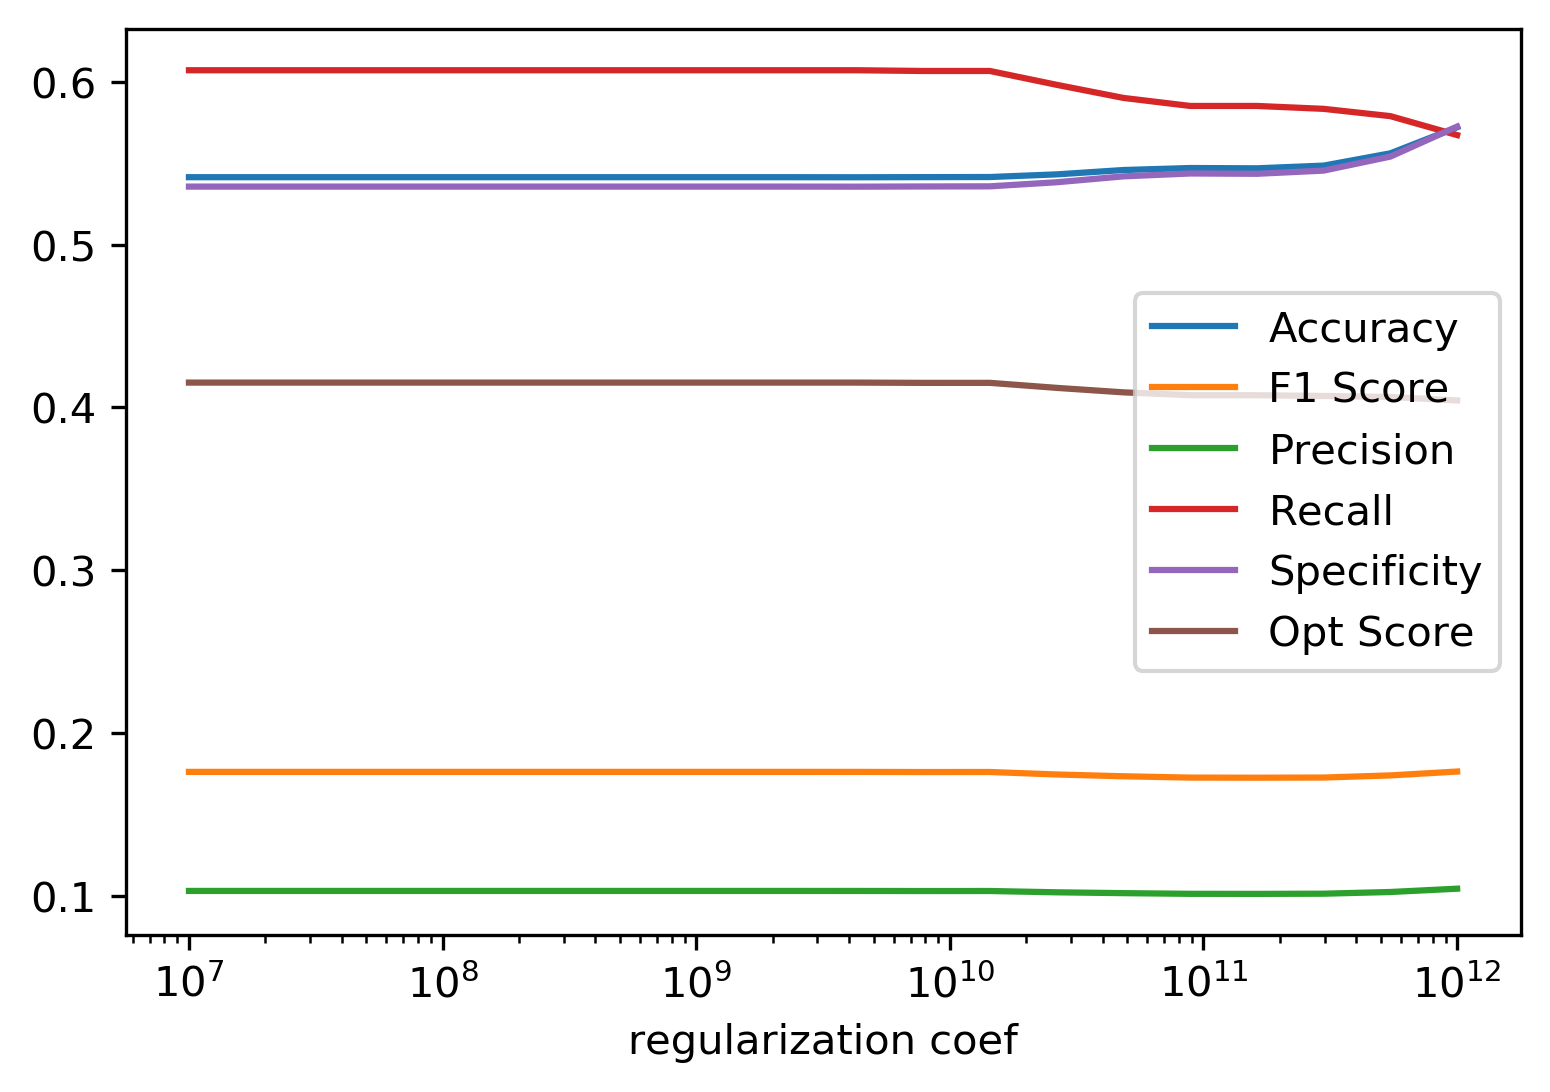

In [103]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bo1['C'], result_bo1[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bo1.png', transparent = True)
plt.show()

In [104]:
print(LR_bo)
print(max_score_bo)

10000000.0
0.41529813554714606


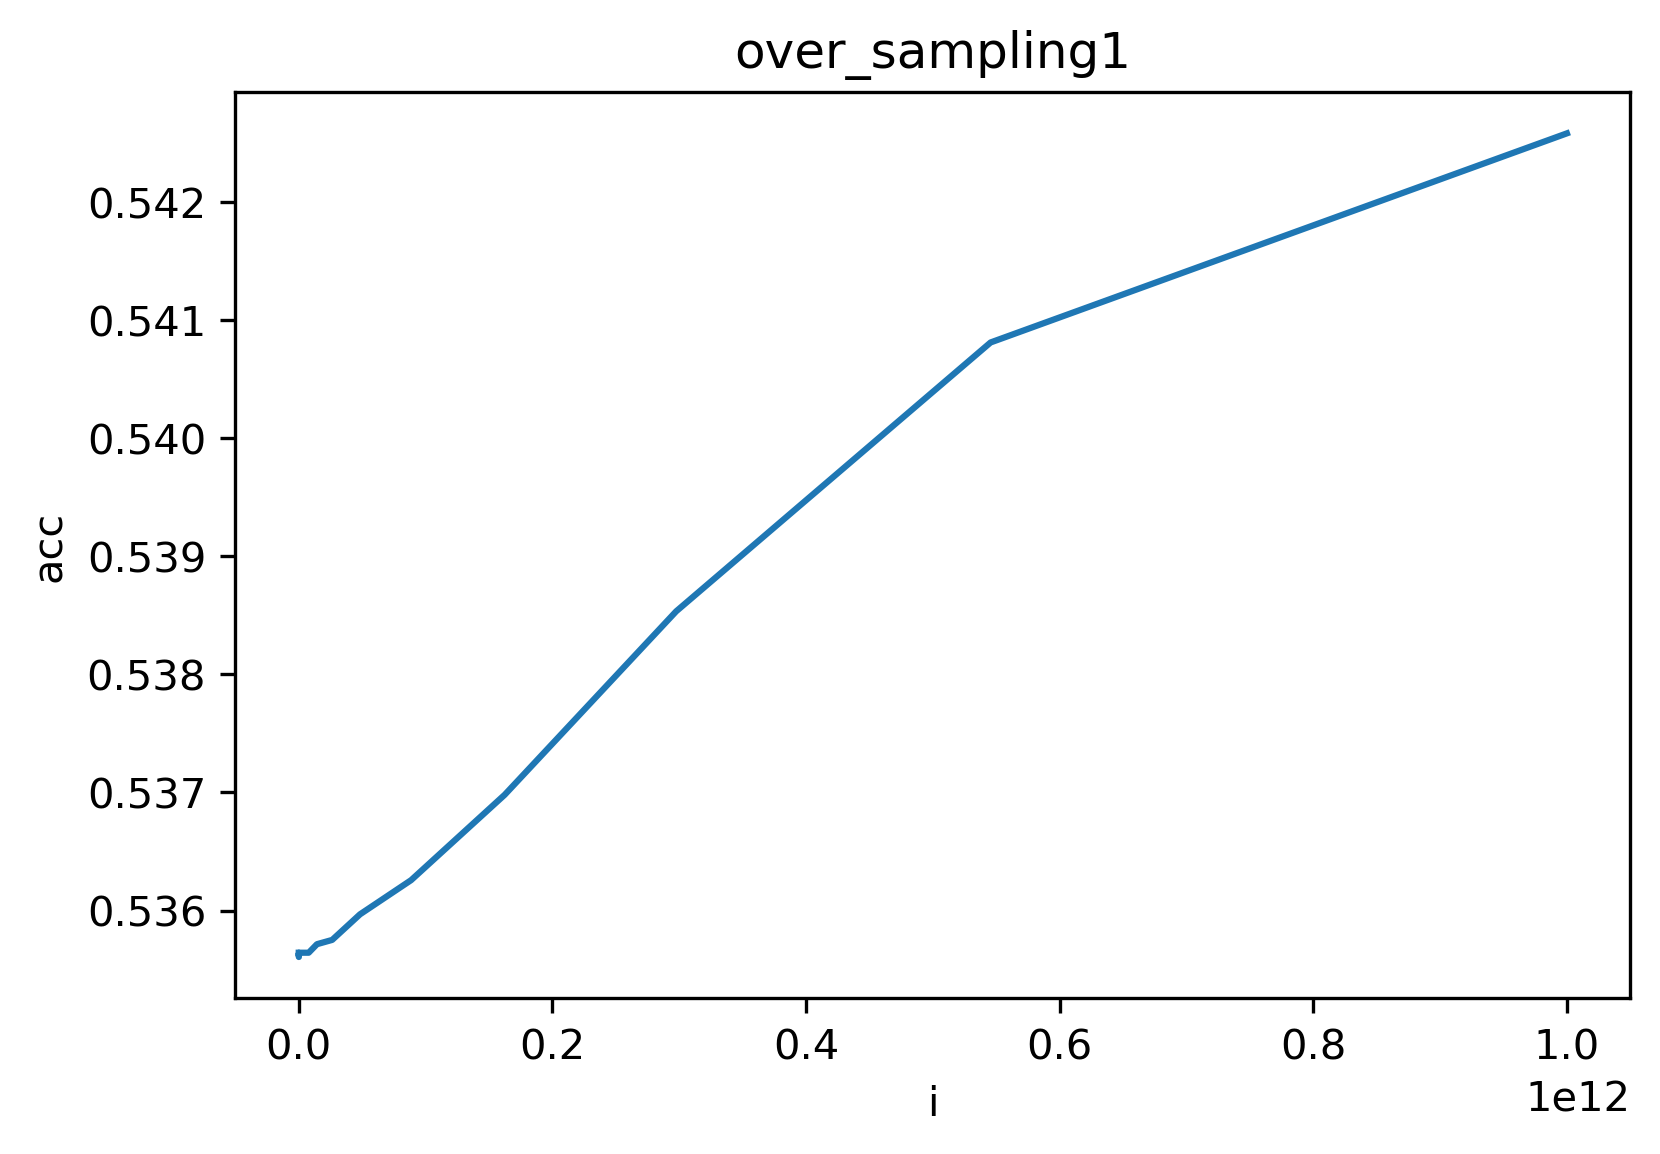

In [54]:
x1 = np.logspace(7, 12, 20)
plt.plot(x1, all1_acc)
plt.ylabel('acc')
plt.xlabel('i')
plt.title('over_sampling1')
plt.show()

In [55]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('over_sampling1.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [130]:
LR_bo2 = 0.0
max_score_bo2 = 0.0

accuracies_bo2 = []
recalls_bo2 = []
f1s_bo2 = []
precisions_bo2 = []
opts_bo2 = []
specificities_bo2 = []

for i in np.logspace(10,15,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbo_valid)
    score = opt_score(ybo_valid, sk_ypred)
    
    accuracies_bo2.append(accuracy_score(ybo_valid, sk_ypred))
    recalls_bo2.append(recall_score(ybo_valid, sk_ypred))
    f1s_bo2.append(f1_score(ybo_valid, sk_ypred))
    precisions_bo2.append(precision_score(ybo_valid, sk_ypred))
    specificities_bo2.append(specificity_score(ybo_valid, sk_ypred))
    opts_bo2.append(score)
    
    if score > max_score_bo2:
        max_score_bo2 = score
        LR_bo2 = i

In [131]:
result_bo2 = pd.DataFrame()
result_bo2['C'] = np.logspace(10,15,20)
result_bo2['Accuracy'] = accuracies_bo2
result_bo2['Precision'] = precisions_bo2
result_bo2['Recall'] = recalls_bo2
result_bo2['F1 Score'] = f1s_bo2
result_bo2['Specificity'] = specificities_bo2
result_bo2['Opt Score'] = opts_bo2

display(result_bo2)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+10,0.541497,0.102985,0.606711,0.176081,0.535768,0.415128
1,1.832981e+10,0.541858,0.102701,0.604027,0.175553,0.536397,0.414131
2,3.359818e+10,0.543990,0.101703,0.593289,0.173640,0.539659,0.410247
3,6.158482e+10,0.546808,0.101454,0.587025,0.173007,0.543275,0.408217
4,1.128838e+11,0.547241,0.101116,0.583893,0.172380,0.544022,0.407056
5,2.069138e+11,0.547205,0.101170,0.584340,0.172478,0.543943,0.407226
6,3.792690e+11,0.550276,0.101716,0.583445,0.173231,0.547363,0.407336
7,6.951928e+11,0.561694,0.103399,0.577181,0.175379,0.560333,0.406596
8,1.274275e+12,0.579362,0.104781,0.557942,0.176429,0.581244,0.401713
9,2.335721e+12,0.594573,0.105808,0.539597,0.176924,0.599403,0.396813


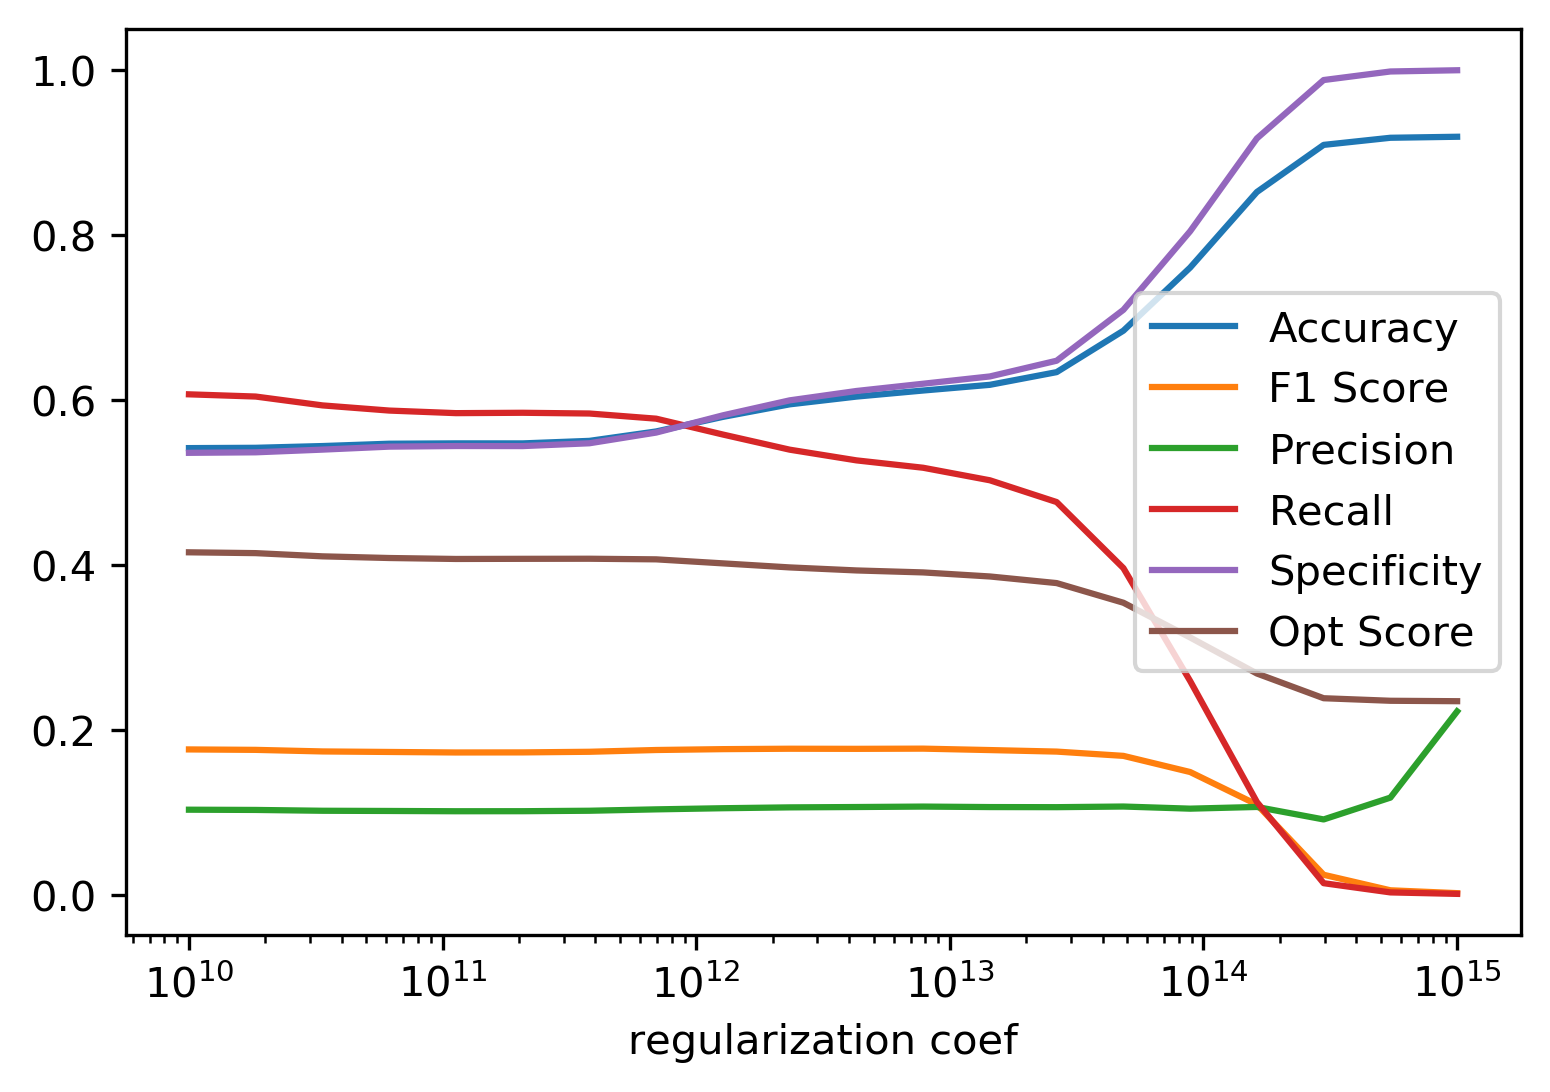

In [140]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bo2['C'], result_bo2[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bo2.png', transparent = True)
plt.show()

In [133]:
print(LR_bo2)
print(max_score_bo2)

10000000000.0
0.41512837336517217


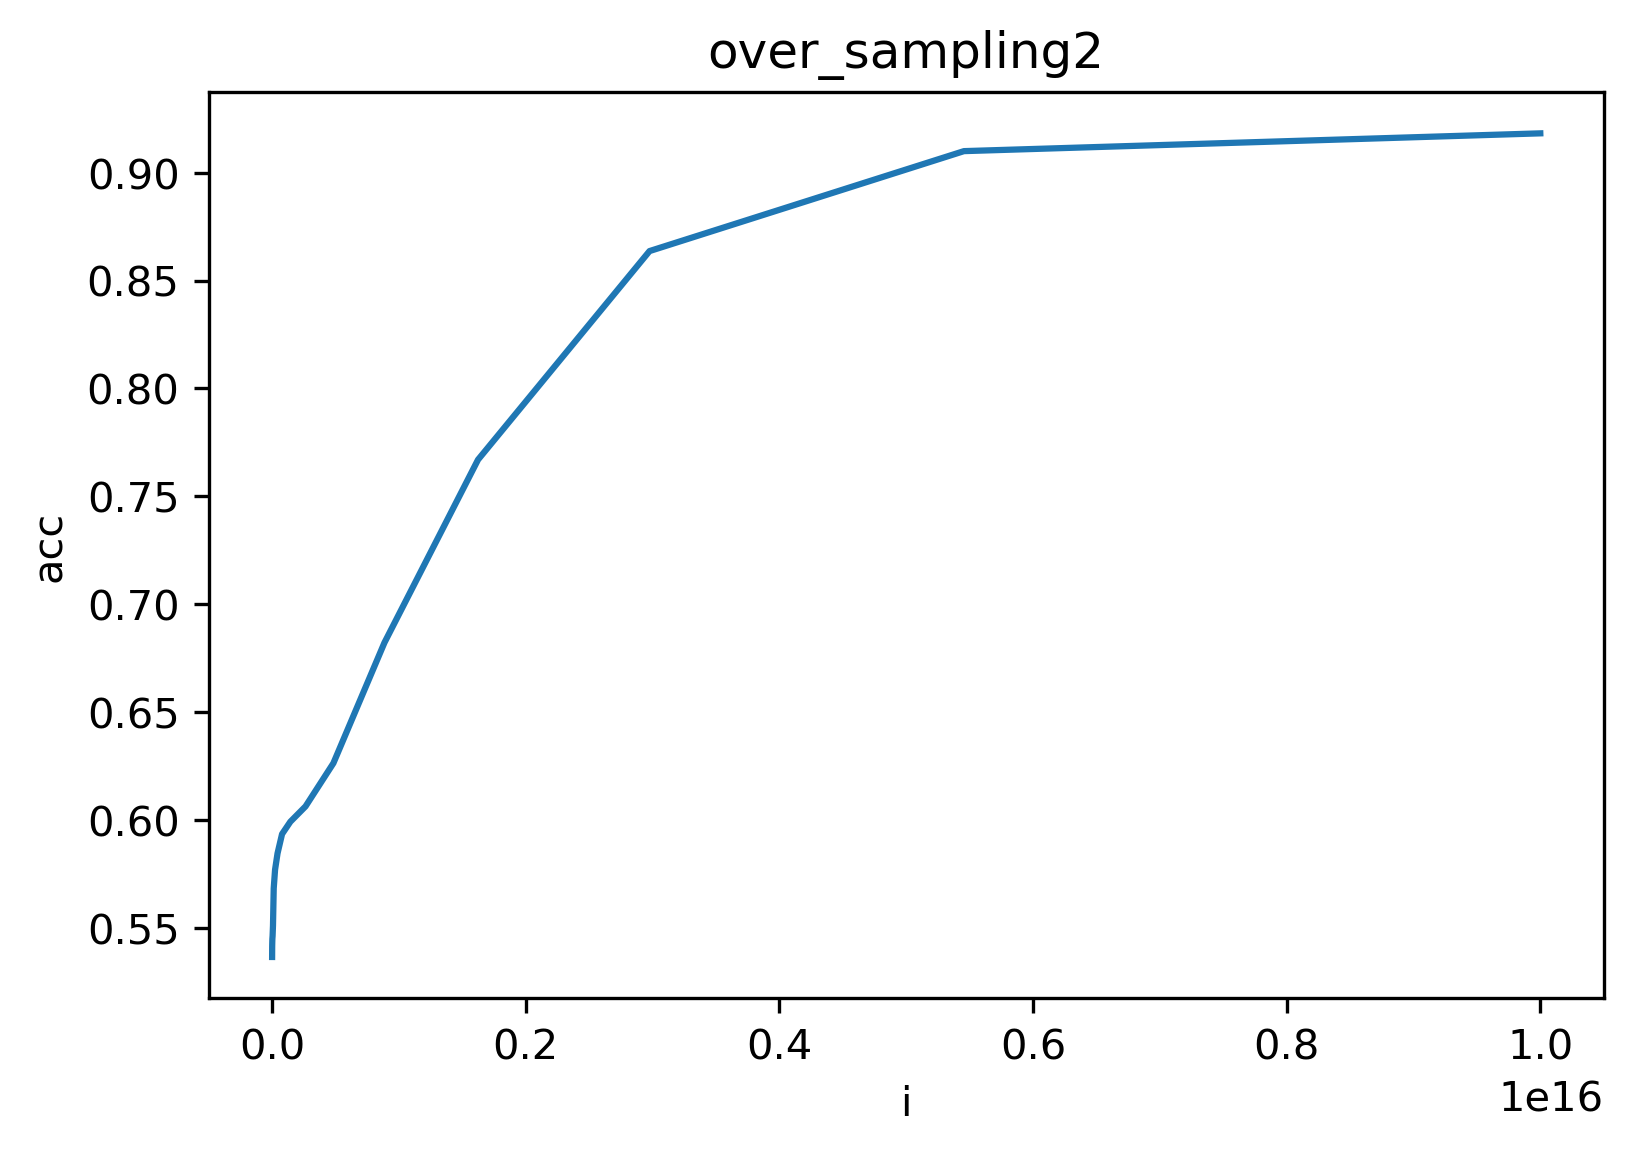

In [58]:
x2 = np.logspace(11, 16, 20)
plt.plot(x2, all2_acc)
plt.ylabel('acc')
plt.xlabel('i')
plt.title('over_sampling2')
plt.show()

In [59]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('over_sampling2.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [134]:
LR_bo3 = 0.0
max_score_bo3 = 0.0

accuracies_bo3 = []
recalls_bo3 = []
f1s_bo3 = []
precisions_bo3 = []
opts_bo3 = []
specificities_bo3 = []

for i in np.logspace(2,7,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbo_valid)
    score = opt_score(ybo_valid, sk_ypred)
    
    accuracies_bo3.append(accuracy_score(ybo_valid, sk_ypred))
    recalls_bo3.append(recall_score(ybo_valid, sk_ypred))
    f1s_bo3.append(f1_score(ybo_valid, sk_ypred))
    precisions_bo3.append(precision_score(ybo_valid, sk_ypred))
    specificities_bo3.append(specificity_score(ybo_valid, sk_ypred))
    opts_bo3.append(score)
    
    if score > max_score_bo3:
        max_score_bo3 = score
        LR_bo3 = i

In [135]:
result_bo3 = pd.DataFrame()
result_bo3['C'] = np.logspace(2,7,20)
result_bo3['Accuracy'] = accuracies_bo3
result_bo3['Precision'] = precisions_bo3
result_bo3['Recall'] = recalls_bo3
result_bo3['F1 Score'] = f1s_bo3
result_bo3['Specificity'] = specificities_bo3
result_bo3['Opt Score'] = opts_bo3

display(result_bo3)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+02,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
1,1.832981e+02,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
2,3.359818e+02,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
3,6.158482e+02,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
4,1.128838e+03,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
5,2.069138e+03,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
6,3.792690e+03,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
7,6.951928e+03,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
8,1.274275e+04,0.541460,0.103037,0.607159,0.176177,0.535689,0.415298
9,2.335721e+04,0.541497,0.103045,0.607159,0.176188,0.535728,0.415304


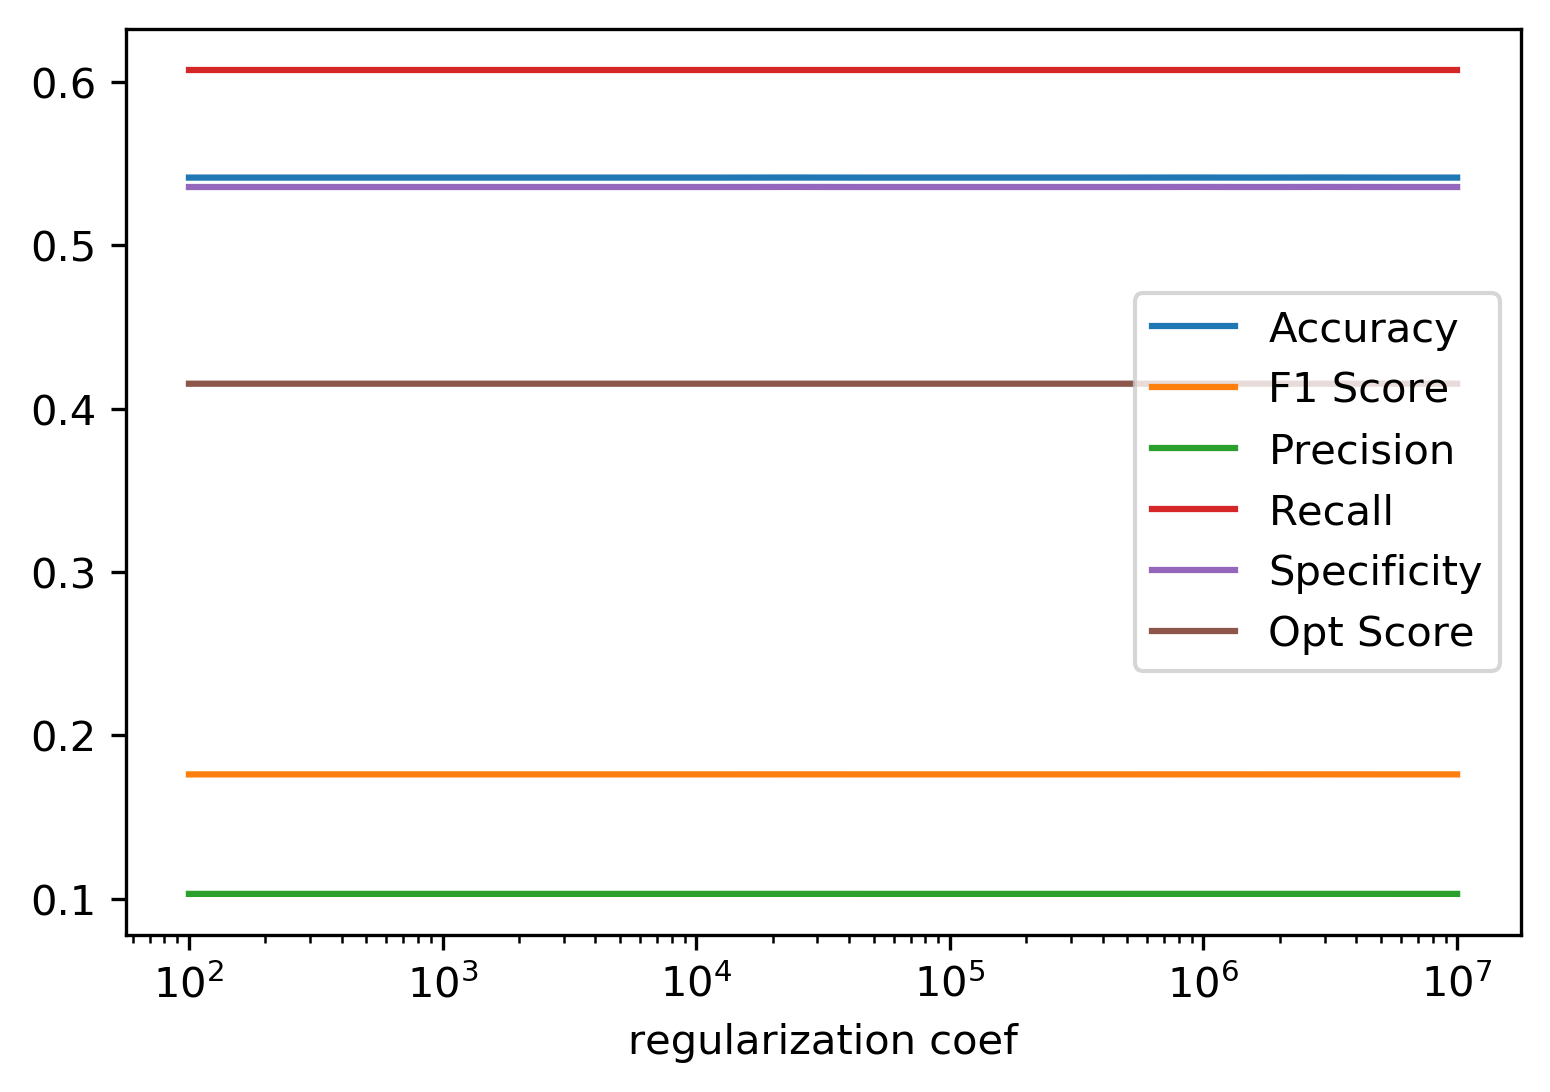

In [141]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bo3['C'], result_bo3[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bo3.png', transparent = True)
plt.show()

In [137]:
print(LR_bo3)
print(max_score_bo3)

23357.21469090121
0.4153035553510137


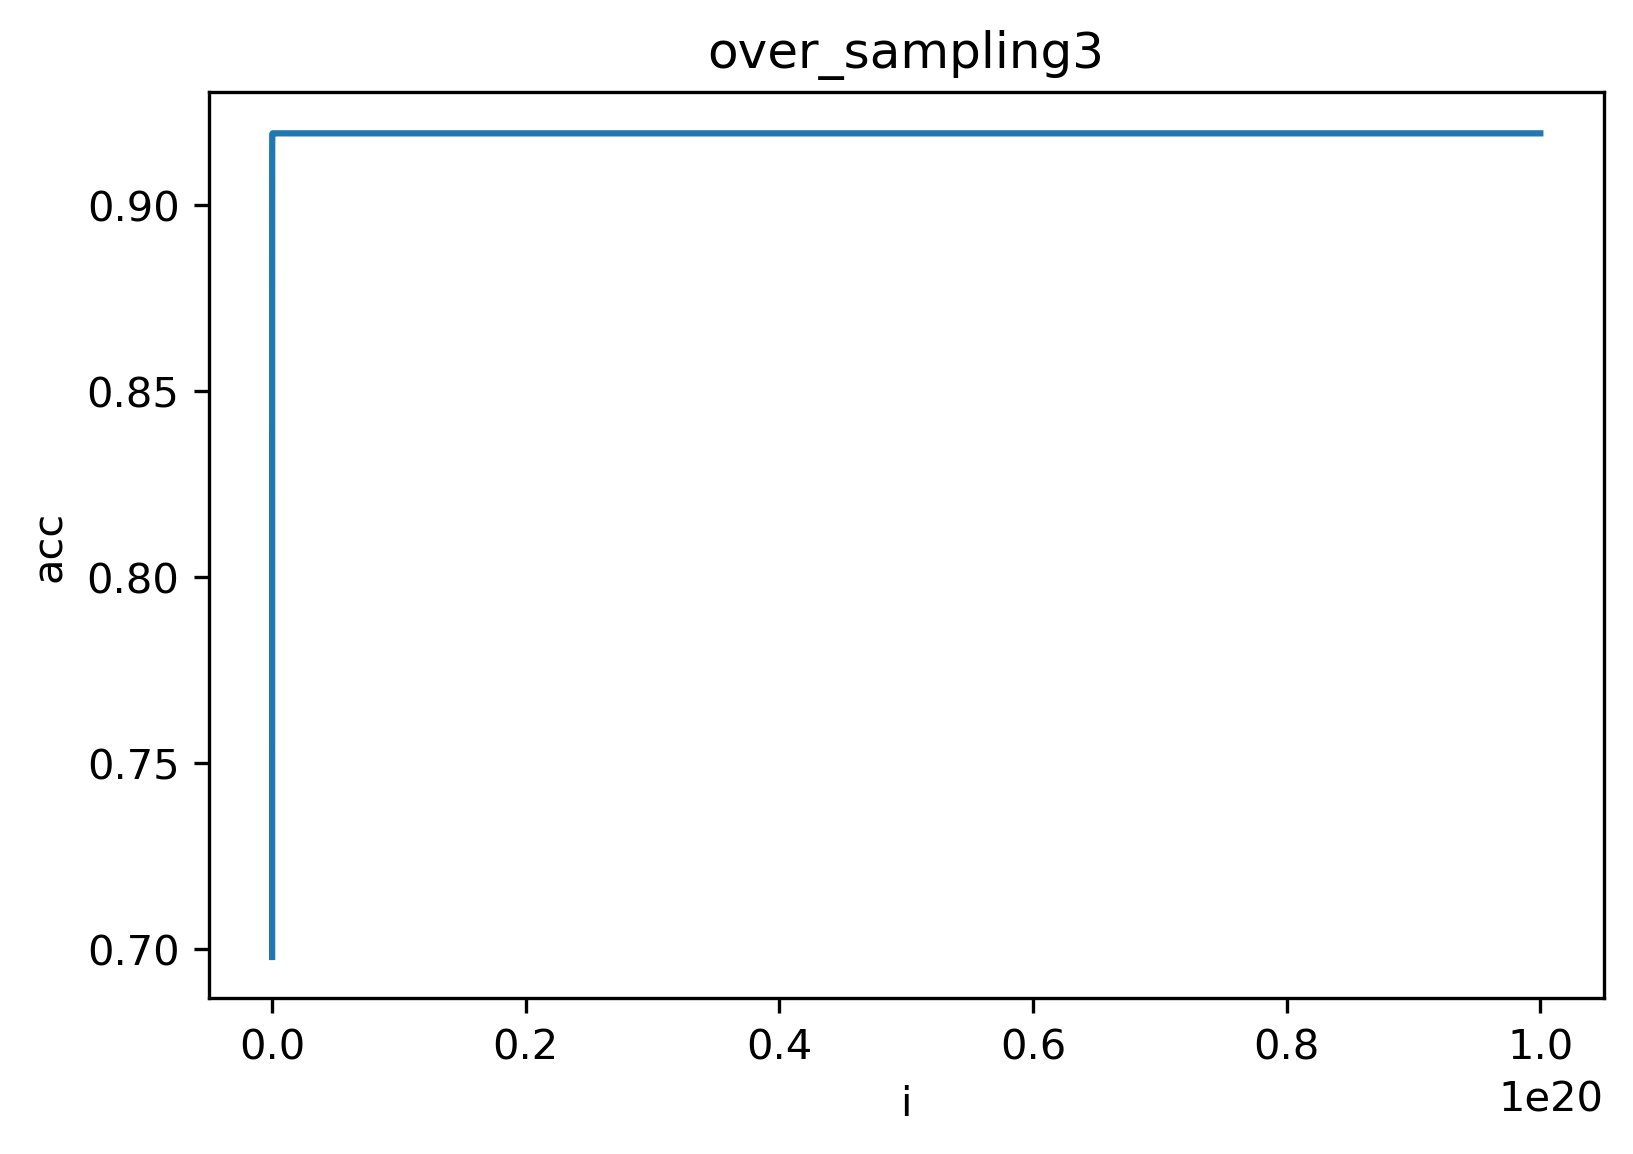

In [62]:
x3 = np.logspace(15, 20, 20)
plt.plot(x3, all3_acc)
plt.ylabel('acc')
plt.xlabel('i')
plt.title('over_sampling3')
plt.show()

In [63]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('over_sampling3.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [138]:
xbo_train = np.r_[xbo_subtrain, xbo_valid]
ybo_train = np.r_[ybo_subtrain, ybo_valid]

In [139]:
sk_current = LogisticRegression(C = 1/LR_bo3).fit(xbo_train, ybo_train)
joblib.dump(sk_current, 'oversampling_model')
sk_ypred = sk_current.predict(xbo_test)
score = opt_score(ybo_test, sk_ypred)

accuracy_bo = accuracy_score(ybo_test, sk_ypred)
recall_bo = recall_score(ybo_test, sk_ypred)
f1_bo = f1_score(ybo_test, sk_ypred)
precision_bo = precision_score(ybo_test, sk_ypred)
specificity_bo = specificity_score(ybo_test, sk_ypred)
opt_bo = score

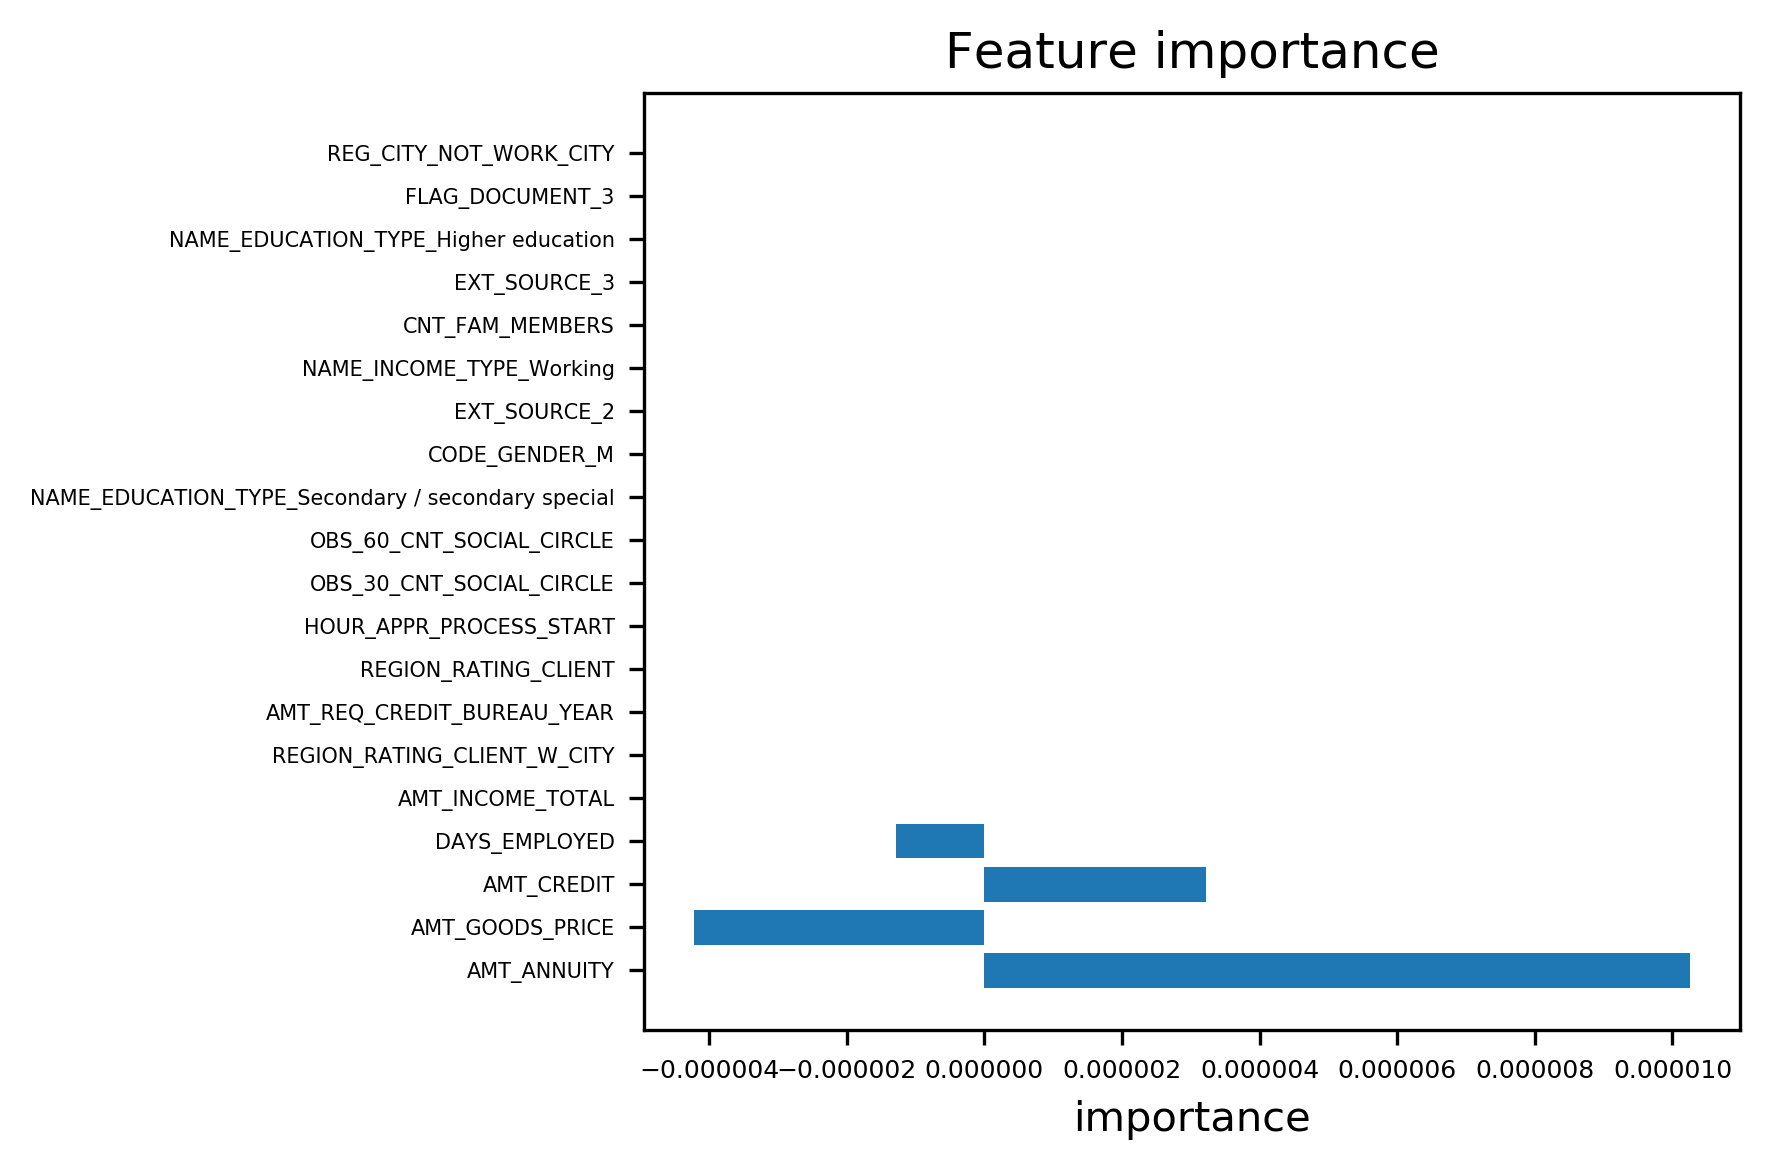

In [142]:
coef = sk_current.coef_[0].copy()
sorted_coef = sorted(range(len(coef)), key = lambda s: abs(coef[s]), reverse = True)
top20_f = []
top20_c = []
for i in range(20):
    top20_f.append(dff.columns[sorted_coef[i]])
    top20_c.append(coef[sorted_coef[i]])

plt.rcParams['figure.dpi'] = 300
plt.barh(top20_f, top20_c,)
plt.xlabel('importance')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.title('Feature importance')
plt.tight_layout()
plt.savefig('important_features_bo.png', transparent = True)
plt.show()

In [143]:
top20_c

[1.0257443382551133e-05,
 -4.223812709130429e-06,
 3.214743821517575e-06,
 -1.2772052735607119e-06,
 -5.333521876532429e-09,
 1.951168396934283e-09,
 1.9425276828112357e-09,
 1.9377170115673215e-09,
 1.8213676749597667e-09,
 1.4730801636474148e-09,
 1.458231090341848e-09,
 1.1428819711611502e-09,
 9.96689020340605e-10,
 -9.650837584968047e-10,
 8.907913032284319e-10,
 8.760025617701501e-10,
 -8.587001593070613e-10,
 -8.217522630415675e-10,
 7.907923152112647e-10,
 7.343230649647222e-10]

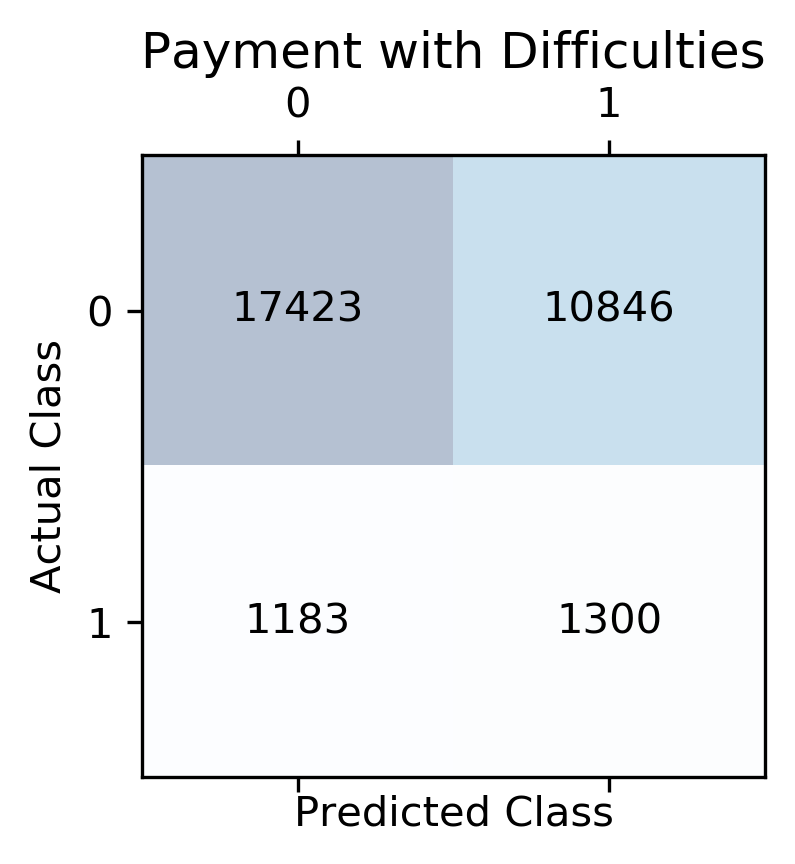

In [144]:
confmat = confusion_matrix(y_true=ybo_test, y_pred=sk_ypred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Payment with Difficulties', y=1.1)
plt.tight_layout()
plt.savefig('oversampling_confusion_matrix.png', transparent = True)
plt.show()

AUC: 0.596506


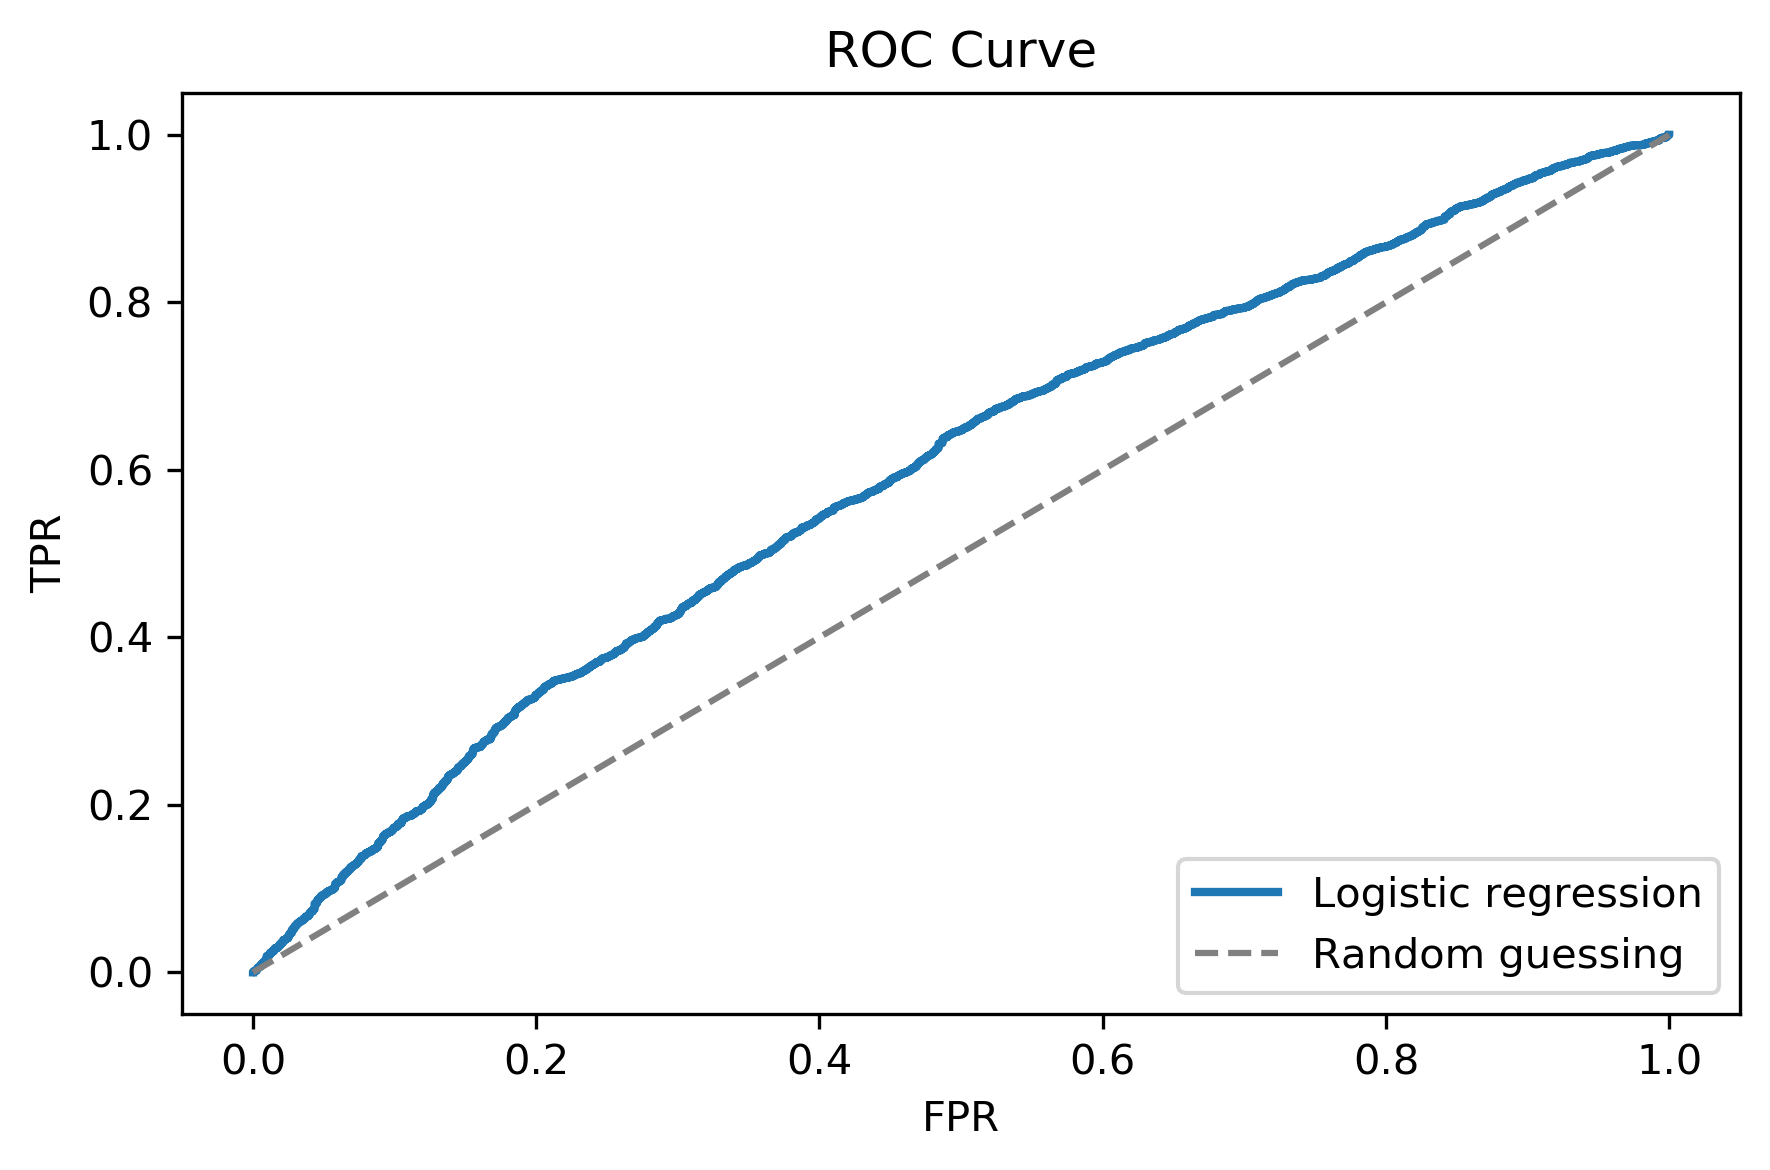

In [145]:
probas = sk_current.predict_proba(xbo_test)
fpr, tpr, thresholds = roc_curve(ybo_test, probas[:, 0], pos_label=0)
print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2, label='Logistic regression')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
#plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray', label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC_bu.png', transparent = True)
plt.show()

In [147]:
print("Accuracy: ", accuracy_bo)
print("Recall: ", recall_bo)
print("F1: ", f1_bo)
print("Precision: ", precision_bo)
print("Specificity: ", specificity_bo)
print("Opt score: ", opt_bo)

Accuracy:  0.6088384495317378
Recall:  0.5235602094240838
F1:  0.1777291680907786
Precision:  0.1070311213568253
Specificity:  0.6163288407796527
Opt score:  0.392673445201837


---

### using PCA data

#### imbalanced

In [70]:
df4 = pd.read_csv('preprocessed_pca.csv')

In [72]:
#delete first column
df4 = df4.drop(['Unnamed: 0'], axis=1)

In [73]:
display(df4)

,0,1,2,3,4,5,6,7,8,9,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,-263236.623292,59590.030085,-66618.350309,-7745.584477,-2655.957357,1.182016,-1.937906,-0.959241,-1.353861,-0.259693,...,0,0,0,0,0,0,0,0,0,0
1,917857.991006,25986.120024,-46604.938193,-33447.977972,10203.989951,-0.558965,-1.290248,-1.655416,-0.618804,-0.210710,...,0,0,0,0,0,0,0,0,0,0
2,-619808.672156,-45173.308603,-77931.996197,16900.251209,8030.166185,-1.780724,-3.208695,-1.834707,-1.304752,-0.207462,...,0,0,0,0,0,0,0,0,0,0
3,-374087.554816,1664.158355,-73896.130201,16261.277319,-9746.507188,0.348769,4.925901,-0.417126,-0.447737,-0.118210,...,0,0,0,0,0,0,0,0,0,0
4,-82929.724812,-36773.834924,-70112.309859,40041.496096,4265.681937,-1.936306,-1.506860,-1.747526,-1.303036,-0.298217,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-463316.900609,31663.231893,-71358.102470,2250.082902,-9567.872304,-2.262391,2.811885,0.206839,-1.270618,-0.064134,...,0,0,0,0,0,0,0,0,0,0
307507,-466843.413238,-72456.355871,289444.532235,-9416.339492,3837.543575,-1.745482,-3.431403,-0.792727,-0.611567,-0.026927,...,0,0,0,0,0,0,0,0,0,1
307508,89344.751144,-19895.664909,-71228.342859,-18164.990792,-982.854338,6.759380,-2.470601,-1.022940,-1.427277,0.573414,...,0,0,0,0,0,0,0,0,0,0
307509,-313905.264900,32555.945833,-73039.144012,-6214.723845,772.924620,-1.705403,-3.239050,-1.900443,-0.560912,-0.207405,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = df4['TARGET']
tmp = df4.copy()
x = tmp.drop(['TARGET'], axis=1)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1024)

In [79]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1024)

In [80]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(249083, 177)
(27676, 177)
(30752, 177)


In [92]:
LR_a = 0.0
max_acc = 0.0
all1_acc = []
for i in np.logspace(9,14,20):
    sk_current = LogisticRegression(C = 1/i)
    sk_current.fit(x_train, y_train)
    sk_ypred = sk_current.predict(x_val)
    acc = float(sum(sk_ypred == y_val)) / len(y_val)
    all1_acc.append(acc)
    if acc > max_acc:
        max_acc = acc
        LR_a = i

In [93]:
print(LR_a)
print(max_acc)

16237767391887.176
0.4414655297008238


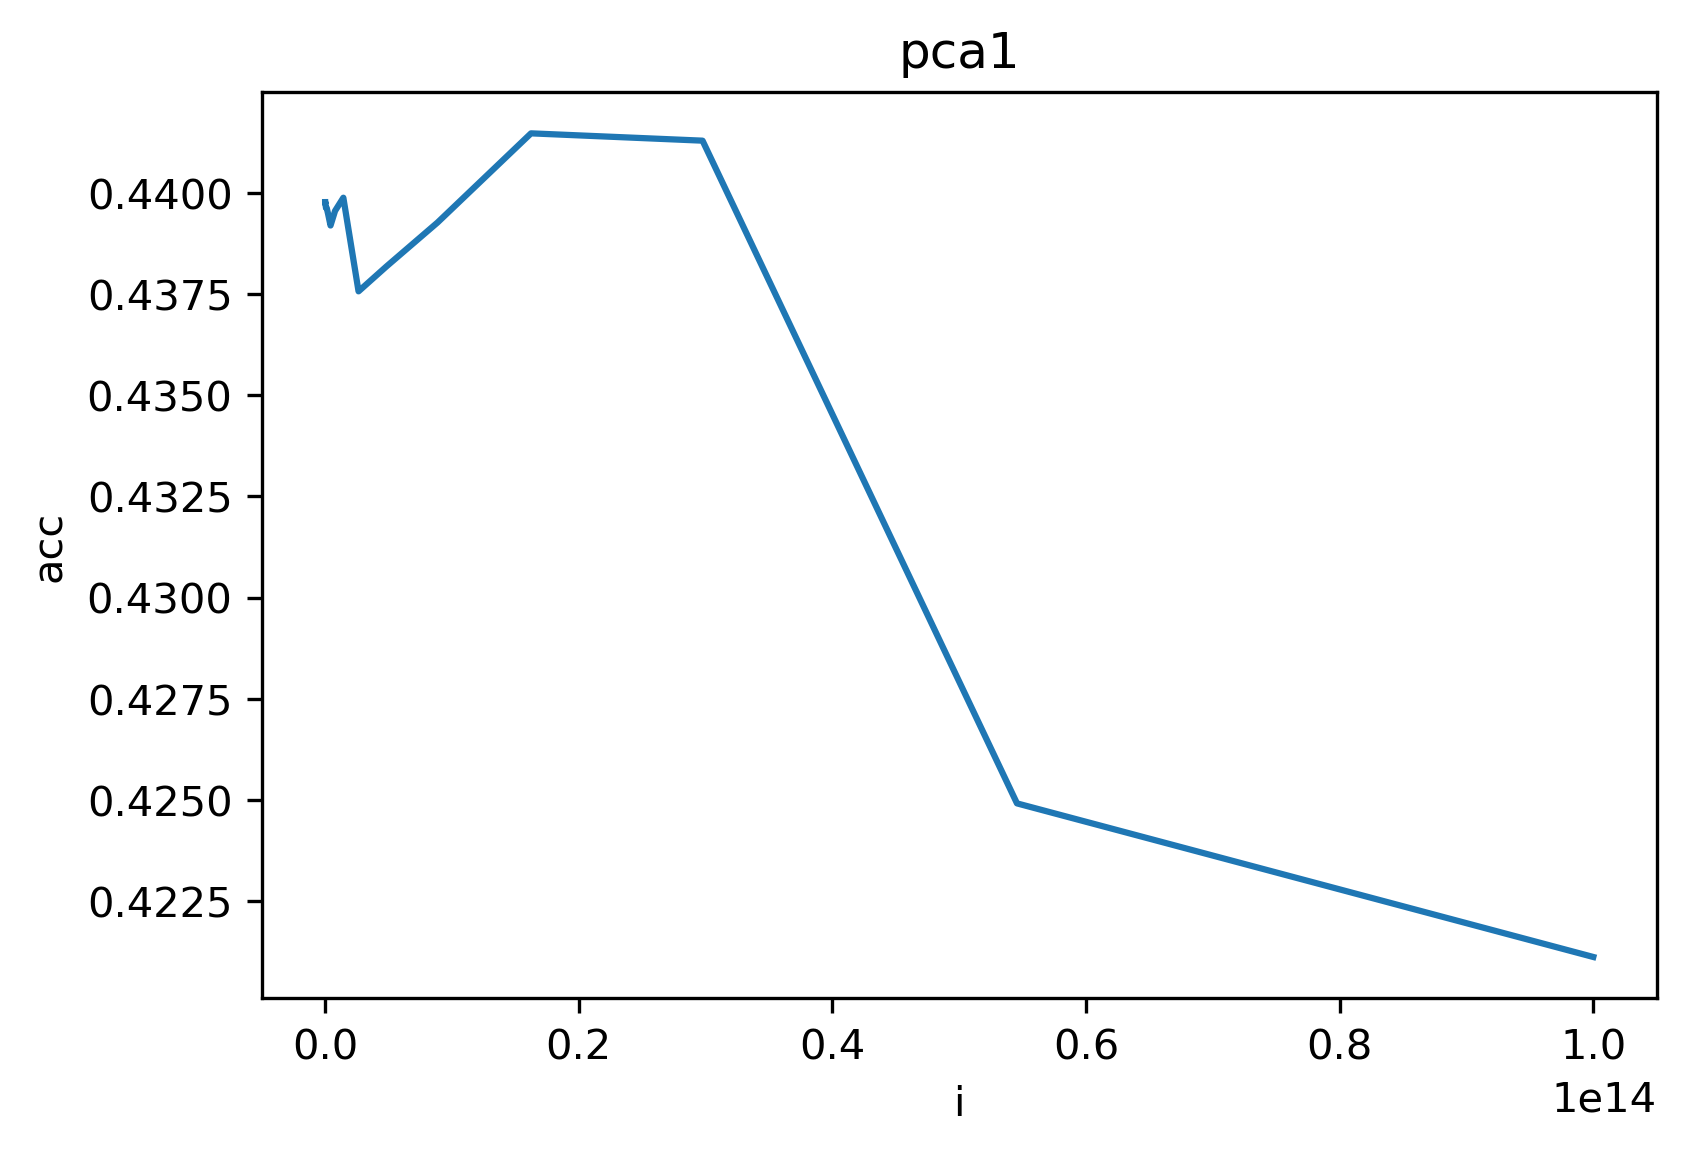

In [98]:
x1 = np.logspace(9, 14, 20)
plt.plot(x1, all1_acc)
plt.ylabel('acc')
plt.xlabel('i')
plt.title('pca1')
plt.show()

In [99]:
plt.rcParams['figure.dpi'] = 300
plt.savefig('pca1.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [100]:
LR_a2 = 0.0
max_acc2 = 0.0
all2_acc = []
for i in np.logspace(14,19,20):
    sk_current = LogisticRegression(C = 1/i)
    sk_current.fit(x_train, y_train)
    sk_ypred = sk_current.predict(x_val)
    acc = float(sum(sk_ypred == y_val)) / len(y_val)
    all2_acc.append(acc)
    if acc > max_acc2:
        max_acc2 = acc
        LR_a2 = i

In [101]:
print(LR_a2)
print(max_acc2)

2069138081114790.0
0.4968203497615262


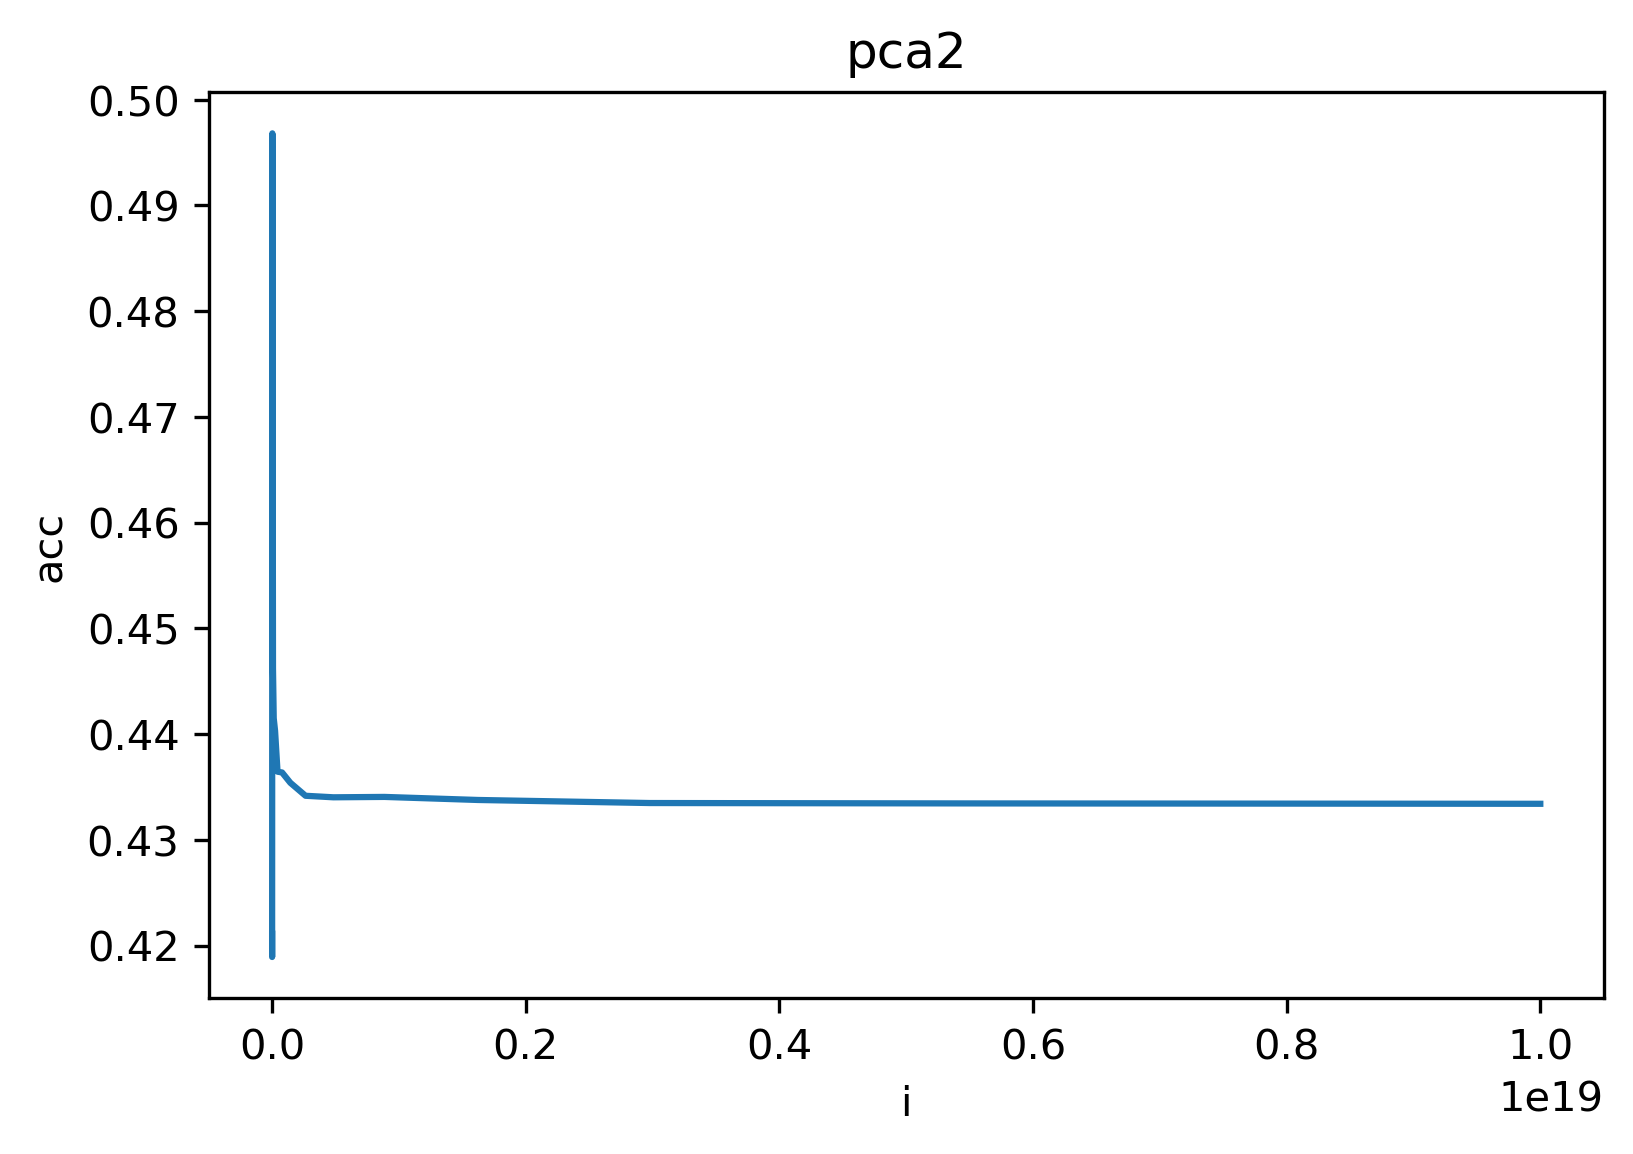

In [102]:
x2 = np.logspace(14, 19, 20)
plt.plot(x2, all2_acc)
plt.ylabel('acc')
plt.xlabel('i')
plt.title('pca2')
plt.show()

In [103]:
print(all2_acc)

[0.42112299465240643, 0.4189189189189189, 0.42618152912270557, 0.43633473045237753, 0.4557378233848822, 0.4968203497615262, 0.47980199450787686, 0.4461988726694609, 0.4415016620898974, 0.44030929325046975, 0.4364431276195982, 0.4363708628414511, 0.4353952883364648, 0.4341667871079636, 0.43402225755166934, 0.43405838994074286, 0.43376933082815433, 0.43348027171556586, 0.4334441393264923, 0.4334080069374187]


In [104]:
plt.rcParams['figure.dpi'] = 300
plt.savefig('pca2.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [105]:
LR_a3 = 0.0
max_acc3 = 0.0
all3_acc = []
for i in np.logspace(9,19,20):
    sk_current = LogisticRegression(C = 1/i)
    sk_current.fit(x_train, y_train)
    sk_ypred = sk_current.predict(x_val)
    acc = float(sum(sk_ypred == y_val)) / len(y_val)
    all3_acc.append(acc)
    if acc > max_acc3:
        max_acc3 = acc
        LR_a3 = i

In [106]:
print(LR_a3)
print(max_acc3)

2069138081114790.0
0.4968203497615262


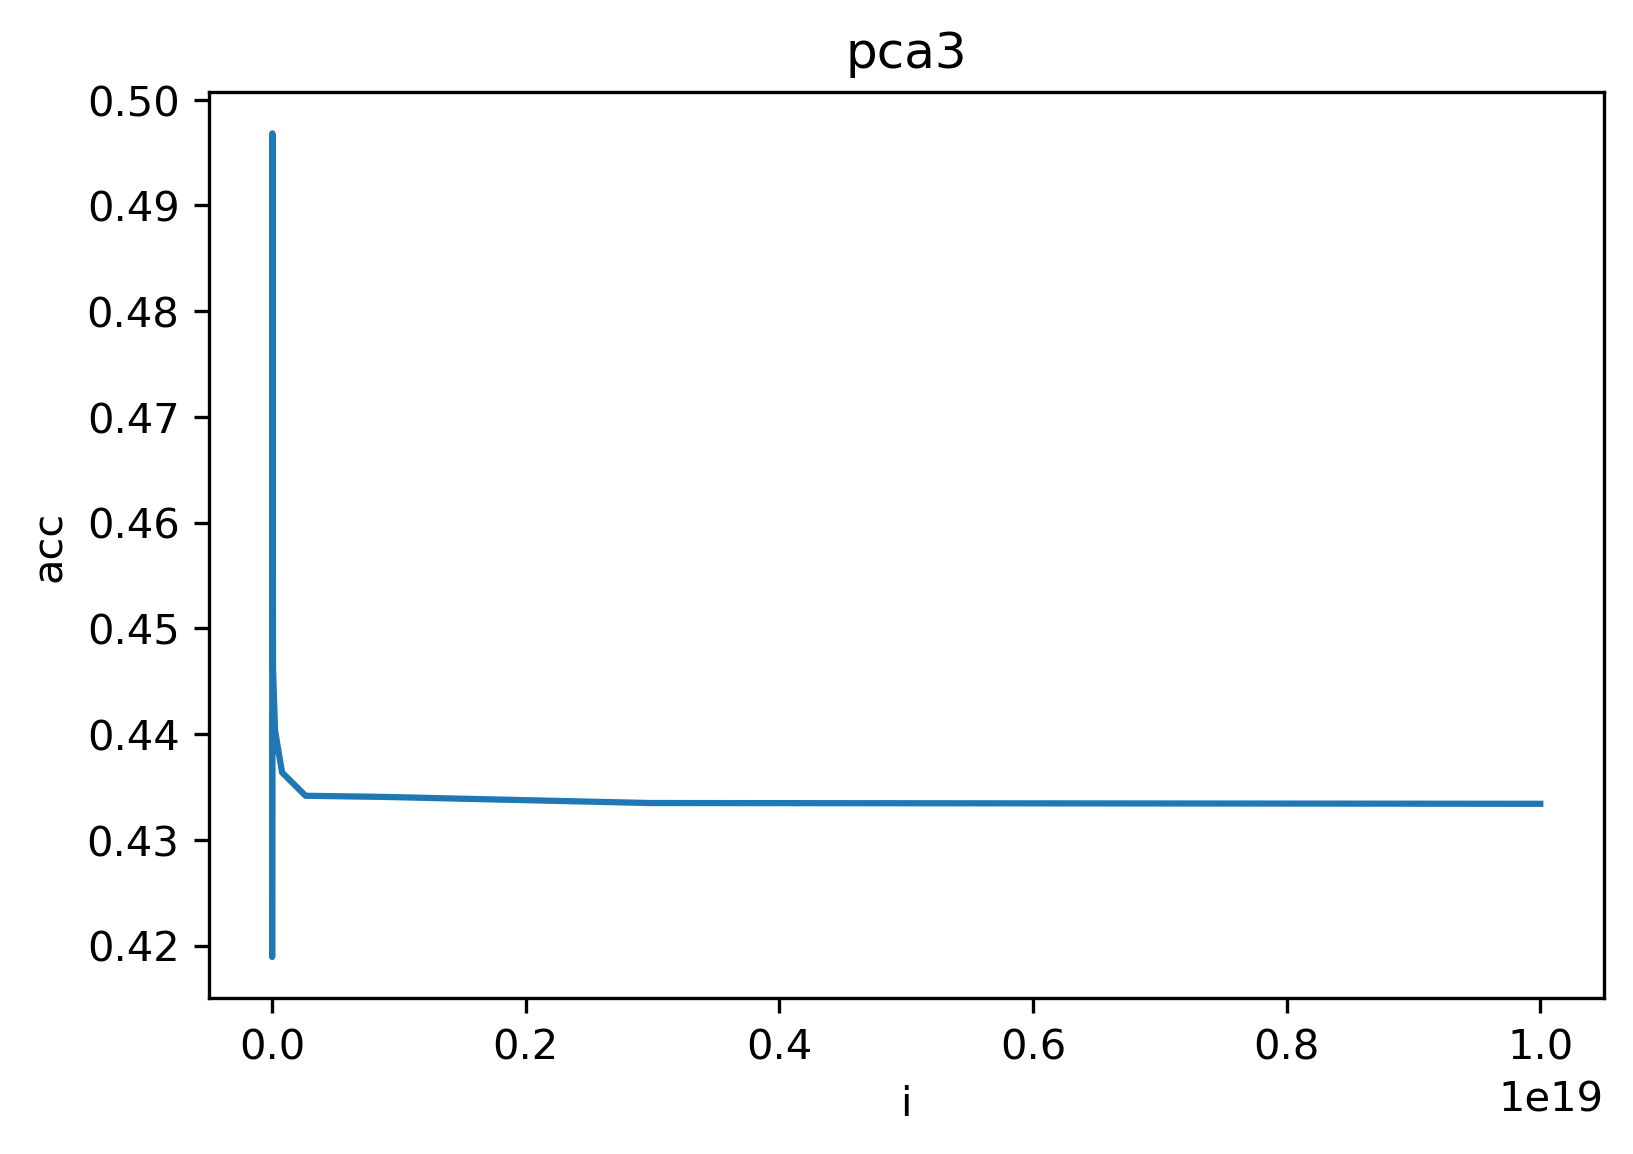

In [107]:
x3 = np.logspace(9, 19, 20)
plt.plot(x3, all3_acc)
plt.ylabel('acc')
plt.xlabel('i')
plt.title('pca3')
plt.show()

In [108]:
plt.rcParams['figure.dpi'] = 300
plt.savefig('pca3.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [109]:
xp_train = np.r_[x_train, x_val]
yp_train = np.r_[y_train, y_val]

In [110]:
sk_current = LogisticRegression(C = 1/LR_a3).fit(xp_train, yp_train)
sk_ypred = sk_current.predict(x_test)
acc = float(sum(sk_ypred == y_test)) / len(y_test)

In [111]:
print(acc)

0.49469953173777315
